In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# ! scp -r arnab_sen_sharma@compute.safe.ai:/data/arnab_sen_sharma/Projects/relations/results ../../

In [3]:
import sys
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
import os
from src import data
import json
from tqdm.auto import tqdm

In [4]:
############################################
sweep_root = "../../results/sweep-24-trials"
model_name = "gptj"
############################################

sweep_path = f"{sweep_root}/{model_name}"

In [5]:
from src.utils.sweep_utils import read_sweep_results, relation_from_dict

In [6]:
sweep_results = read_sweep_results(sweep_path)
list(sweep_results.keys())

--> ../../results/sweep-24-trials/gptj
    --> ../../results/sweep-24-trials/gptj/person_occupation
        --> ../../results/sweep-24-trials/gptj/person_occupation/1_person_occupation_seed_71745
            --> ../../results/sweep-24-trials/gptj/person_occupation/1_person_occupation_seed_71745/results_all.json
            --> ../../results/sweep-24-trials/gptj/person_occupation/1_person_occupation_seed_71745/person_occupation.json
            --> ../../results/sweep-24-trials/gptj/person_occupation/1_person_occupation_seed_71745/args-20230606-211709.json
        --> ../../results/sweep-24-trials/gptj/person_occupation/3_person_occupation_seed_709106
            --> ../../results/sweep-24-trials/gptj/person_occupation/3_person_occupation_seed_709106/args-20230607-012240.json
            --> ../../results/sweep-24-trials/gptj/person_occupation/3_person_occupation_seed_709106/results_all.json
            --> ../../results/sweep-24-trials/gptj/person_occupation/3_person_occupation_seed_70

['person occupation',
 'landmark in country',
 'adjective antonym',
 'person mother',
 'country capital city',
 'plays pro sport',
 'person plays instrument',
 'person university',
 'city in country',
 'food from country',
 'company hq',
 'occupation age',
 'word first letter',
 'country language',
 'object superclass',
 'name religion',
 'person native language',
 'fruit outside color',
 'superhero archnemesis',
 'work location',
 'landmark on continent',
 'person lead singer of band',
 'task person type',
 'country largest city',
 'country currency',
 'fruit inside color',
 'task done by tool',
 'verb past tense',
 'star constellation name',
 'pokemon evolution',
 'product by company',
 'name birthplace',
 'word last letter',
 'word sentiment',
 'company CEO',
 'superhero person',
 'person father',
 'substance phase of matter',
 'person sport position',
 'adjective superlative',
 'adjective comparative',
 'univ degree gender']

In [61]:
sweep_results_bare = read_sweep_results("../../results/sweep-bare-full-rank")
list(sweep_results.keys())

--> ../../results/sweep-bare-full-rank
    --> ../../results/sweep-bare-full-rank/gptj
        --> ../../results/sweep-bare-full-rank/gptj/person_occupation
            --> ../../results/sweep-bare-full-rank/gptj/person_occupation/args-20230603-062846.json
            --> ../../results/sweep-bare-full-rank/gptj/person_occupation/results_all.json
            --> ../../results/sweep-bare-full-rank/gptj/person_occupation/person_occupation.json
        --> ../../results/sweep-bare-full-rank/gptj/landmark_in_country
            --> ../../results/sweep-bare-full-rank/gptj/landmark_in_country/args-20230603-062600.json
        --> ../../results/sweep-bare-full-rank/gptj/adjective_antonym
            --> ../../results/sweep-bare-full-rank/gptj/adjective_antonym/results_all.json
            --> ../../results/sweep-bare-full-rank/gptj/adjective_antonym/adjective_antonym.json
            --> ../../results/sweep-bare-full-rank/gptj/adjective_antonym/args-20230603-063212.json
        --> ../../resul

['person occupation',
 'landmark in country',
 'adjective antonym',
 'person mother',
 'country capital city',
 'plays pro sport',
 'person plays instrument',
 'person university',
 'city in country',
 'food from country',
 'company hq',
 'occupation age',
 'word first letter',
 'country language',
 'object superclass',
 'name religion',
 'person native language',
 'fruit outside color',
 'superhero archnemesis',
 'work location',
 'landmark on continent',
 'person lead singer of band',
 'task person type',
 'country largest city',
 'country currency',
 'fruit inside color',
 'task done by tool',
 'verb past tense',
 'star constellation name',
 'pokemon evolution',
 'product by company',
 'name birthplace',
 'word last letter',
 'word sentiment',
 'company CEO',
 'superhero person',
 'person father',
 'substance phase of matter',
 'person sport position',
 'adjective superlative',
 'adjective comparative',
 'univ degree gender']

In [87]:
relation = "plays pro sport"
relation_result = relation_from_dict(sweep_results[relation])

In [88]:
efficacy = relation_result.best_by_efficacy()
print(f"best by efficacy =>  layer={efficacy.layer}, beta={efficacy.beta.mean:.2f}, rank={efficacy.rank.mean:.0f}")
print("recall:", efficacy.recall)
print("efficacy:", efficacy.efficacy)

faithfulness = relation_result.best_by_faithfulness()
print(f"best by faithfulness => layer={faithfulness.layer}, beta={faithfulness.beta.mean:.2f}, rank={faithfulness.rank.mean:.0f}")
print("recall:", faithfulness.recall)
print("efficacy:", faithfulness.efficacy)

best by efficacy =>  layer=6, beta=0.43, rank=82
recall: 0.83 ± 0.01
efficacy: 0.94 ± 0.00
best by faithfulness => layer=18, beta=0.34, rank=31
recall: 0.91 ± 0.01
efficacy: 0.36 ± 0.01


In [89]:
plt.rcdefaults()
fig_dir = "figs"
#####################################################################################
plt.rcdefaults()
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", labelsize=MEDIUM_SIZE+1)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc("figure", titlesize=50)  # fontsize of the figure title
#####################################################################################

color_scheme = {
    "recall": "darkblue",
    "efficacy": "darkorange",
}

legend_labels = {
    "recall": "Recall@1",
    "efficacy": "Efficacy",
}

def plot_layerwise(canvas, relation_result, attribute = "recall", best_criterion = "faithfulness"):
    by_layer = relation_result.by_layer()

    layers = list(by_layer.keys())
    value_means = [value.__dict__[attribute].mean for value in by_layer.values()]
    value_stds = [value.__dict__[attribute].stdev for value in by_layer.values()]

    if(best_criterion == "faithfulness"):
        best_layer = relation_result.best_by_faithfulness()
    elif(best_criterion == "efficacy"):
        best_layer = relation_result.best_by_efficacy()
    # canvas.scatter([layers.index(best_layer.layer)], [best_layer.__dict__[attribute].mean], color="red", s=200)
    canvas.plot(range(len(layers)), value_means, color=color_scheme[attribute], linewidth=2, label = legend_labels[attribute])
    canvas.fill_between(range(len(layers)), np.array(value_means) - np.array(value_stds), np.array(value_means) + np.array(value_stds), color=color_scheme[attribute], alpha=0.2)

    if attribute in ["recall", "efficacy"]:
        canvas.set_ylim(0, 1)
    else:
        canvas.set_ylim(bottom=0)
    canvas.set_xlabel("Layer")
    canvas.set_ylabel(attribute)
    canvas.set_xticks(range(len(layers)), layers, rotation=90)
    test_samples = [trial.n_test_samples for trial in relation_result.trials]
    test_samples = np.array(test_samples)
    trial_info = f"[{test_samples.mean():.2f} ± {test_samples.std():.2f}]"
    canvas.set_title(f"{relation_result.relation_name} n_trials={len(test_samples)} {trial_info}\n{best_criterion} => h_layer: {best_layer.layer}, beta: {best_layer.beta.mean:.2f}, rank: {best_layer.rank.mean:.2f}, efficacy: {best_layer.efficacy.mean:.2f}")
    
    return canvas

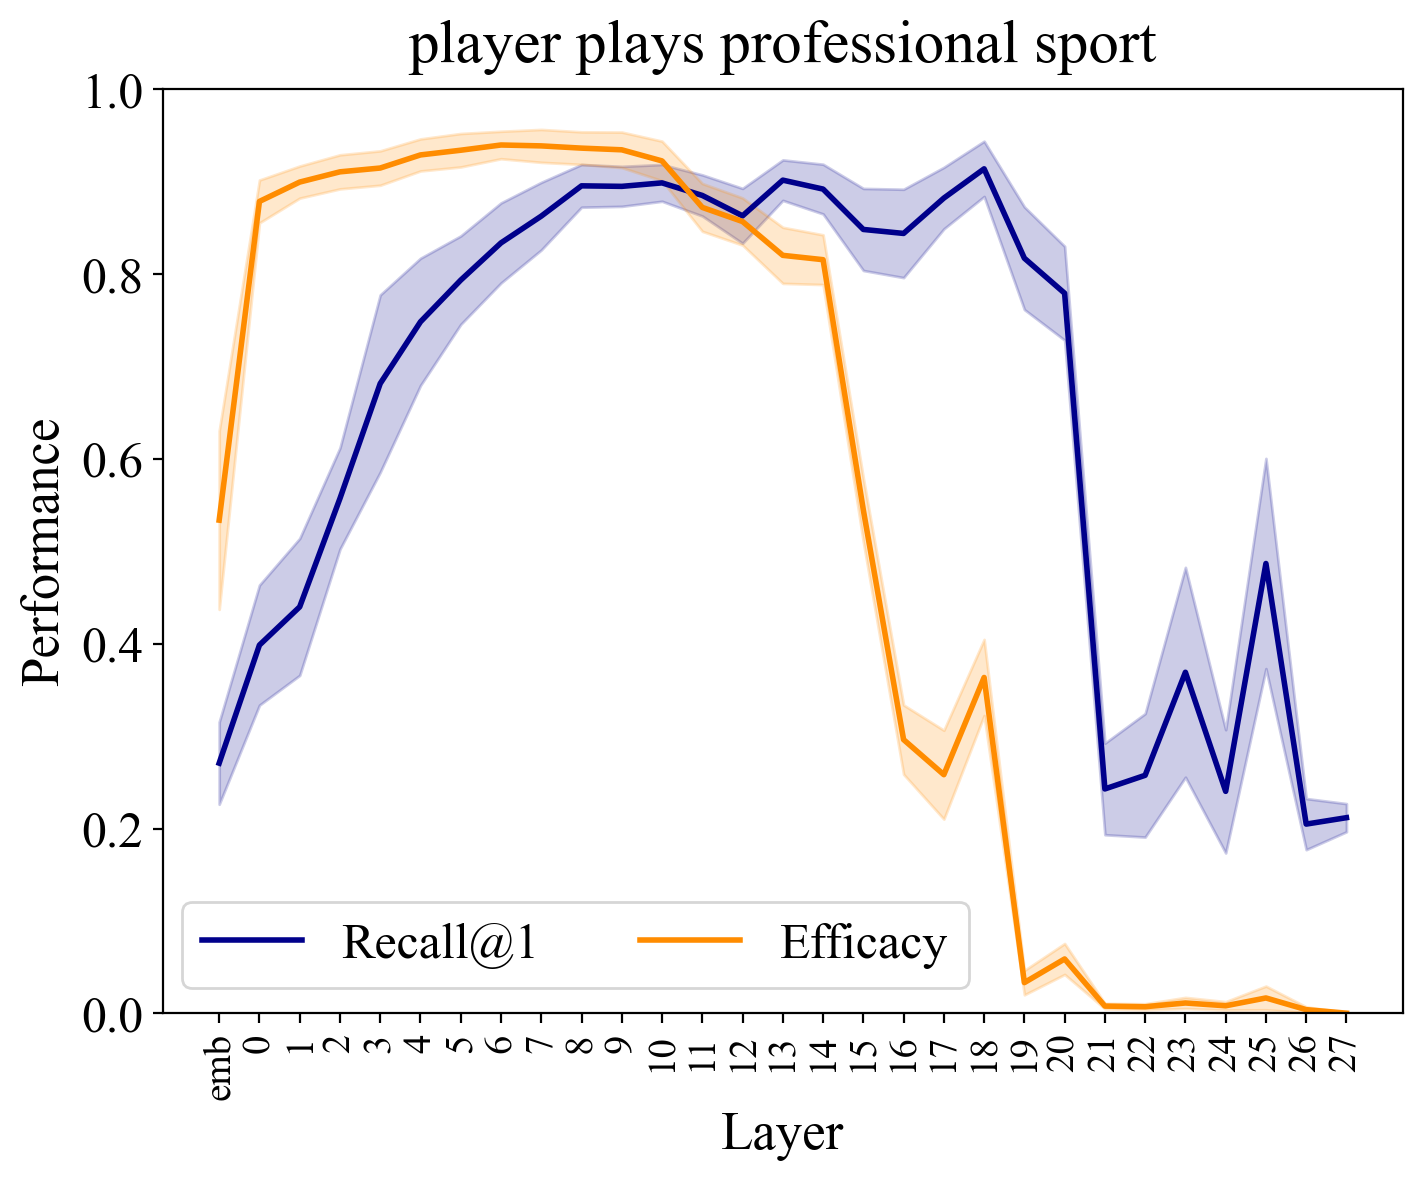

In [90]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 6))
plot_layerwise(ax, relation_result)
plot_layerwise(ax, relation_result, attribute="efficacy", best_criterion="efficacy")
ax.set_ylabel("Performance")
ax.set_title("player plays professional sport", fontsize=BIGGER_SIZE, pad=10)
ax.legend(ncol = 2, bbox_to_anchor=(0.67, .0), loc='lower right')

plt.savefig(f"{fig_dir}/sweep-not-bare.pdf", bbox_inches="tight")
plt.show()

In [13]:
dataset = data.load_dataset()
all_relations = [
    relation.name for relation in dataset.relations
]
all_relations = sorted(all_relations)
# all_relations
failed_relations = list(set(all_relations) - set(sweep_results.keys()))
failed_relations = sorted(failed_relations)
failed_relations

['characteristic gender',
 'name gender',
 'occupation gender',
 'president birth year',
 'president election year']

In [ ]:
############################################
efficacy_root = "../../results/efficacy_baselines"
############################################

efficacy_path = f"{efficacy_root}/{model_name}"

In [ ]:
def read_efficacy_baseline_results(sweep_path):
    efficacy_baseline_results = {}

    for relation_folder in os.listdir(sweep_path):
        cur_sweep = f"{sweep_path}/{relation_folder}"
        if "results_all.json" not in os.listdir(cur_sweep):
            continue
        with open(f"{cur_sweep}/results_all.json") as f:
            res = json.load(f)["relations"]
            if(len(res) == 0 or len(res[0]["trials"]) ==  0):
                continue
            res = res[0]
            efficacy_baseline_results[res["relation_name"]] = res
    return efficacy_baseline_results

efficacy_baseline_results = read_efficacy_baseline_results(efficacy_path)

print(len(efficacy_baseline_results))
list(efficacy_baseline_results.keys())

In [ ]:
from src.metrics import AggregateMetric

In [ ]:
def parse_efficacy_baseline_results(efficacy_result):
    layerwise_results = {}
    for trial in efficacy_result["trials"]:
        for layer in trial["layerwise_baseline_results"]:
            layer_name = layer["layer"]
            if layer_name not in layerwise_results:
                layerwise_results[layer_name] = {
                    edit_type: [] for edit_type in layer["results"].keys()
                }
                layerwise_results[layer_name]
            for edit_type in layer["results"].keys():
                layerwise_results[layer_name][edit_type].append(layer['results'][edit_type])
    
    for layer_name in layerwise_results.keys():
        for edit_type in layerwise_results[layer_name].keys():
            layerwise_results[layer_name][edit_type] = AggregateMetric.aggregate(layerwise_results[layer_name][edit_type])
        
    return {
        "relation_name": efficacy_result["relation_name"],
        "layerwise_result": layerwise_results
    }


parse_efficacy_baseline_results(
    efficacy_baseline_results["country capital city"]
)

In [14]:
color_dict = {
    "low_rank_pinv": "darkblue",
    "hidden_baseline": "darkgreen",
    "embed_baseline": "darkred",
    "hidden_baseline_z": "orange"
}

def plot_efficacy_baseline(ax, efficacy_result):
    layerwise_result = efficacy_result["layerwise_result"]
    layers = list(layerwise_result.keys())
    edit_types = list(layerwise_result[layers[0]].keys())

    for edit_type in edit_types:
        ax.plot(
            range(len(layers)),
            [layerwise_result[layer][edit_type].mean for layer in layers],
            label=edit_type,
            color=color_dict[edit_type],
            alpha=0.7,
            linestyle='--'
        )
        ax.fill_between(
            range(len(layers)),
            [layerwise_result[layer][edit_type].mean - layerwise_result[layer][edit_type].stdev for layer in layers],
            [layerwise_result[layer][edit_type].mean + layerwise_result[layer][edit_type].stdev for layer in layers],
            alpha=0.1,
            color=color_dict[edit_type]
        )
    ax.set_xticks(range(len(layers)))
    ax.set_xticklabels(layers)
    ax.legend()
    ax.set_xlabel("Layer")
    ax.set_ylabel("Efficacy")
    if(ax.get_title() == ""):
        ax.set_title(efficacy_result["relation_name"])



efficacy_result = parse_efficacy_baseline_results(
    efficacy_baseline_results["country capital city"]
)

fig, ax = plt.subplots(figsize=(10, 5))
plot_efficacy_baseline(ax, efficacy_result)

NameError: name 'parse_efficacy_baseline_results' is not defined

In [ ]:
relation_result = parse_results(sweep_results['country capital city'])

nrows = 1
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 6))

plot_layerwise(ax[0], relation_result)
plot_layerwise(ax[1], relation_result, attribute="efficacy", best_criterion="efficacy")
plot_efficacy_baseline(ax[1], efficacy_result)

fig.show()

In [ ]:
# ranks = {
#     layer : layer_summary.rank.values
#     for layer, layer_summary in relation_result.by_layer().items()
# }
# ranks

In [9]:
dataset = data.load_dataset()
interested_dataset = dataset.filter(
    # relation_type = ["factual"]
)

filtered_results = {}
for relation in tqdm(interested_dataset.relations):
    if relation.name not in sweep_results:
        continue
    relation_result = relation_from_dict(sweep_results[relation.name])
    if len(relation_result.trials) < 3:
        print(f"skipping {relation.name}, not enough trials, : {[trial.n_test_samples for trial in relation_result.trials]}")
        continue
    filtered_results[relation.name] = relation_result

  0%|          | 0/47 [00:00<?, ?it/s]

skipping occupation age, not enough trials, : [23]


0 univ degree gender
1 name birthplace
2 name religion
3 person native language
4 fruit inside color


/tmp/ipykernel_766263/297102453.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


5 fruit outside color
6 object superclass
7 substance phase of matter
8 task person type
9 task done by tool
10 word sentiment
11 work location
12 city in country
13 company CEO
14 company hq
15 country capital city
16 country currency
17 country language
18 country largest city
19 food from country
20 landmark in country
21 landmark on continent
22 person lead singer of band
23 person father
24 person mother
25 person occupation
26 person plays instrument
27 person sport position
28 plays pro sport
29 person university
30 pokemon evolution
31 product by company
32 star constellation name
33 superhero archnemesis
34 superhero person
35 adjective antonym
36 adjective comparative
37 adjective superlative
38 verb past tense
39 word first letter
40 word last letter


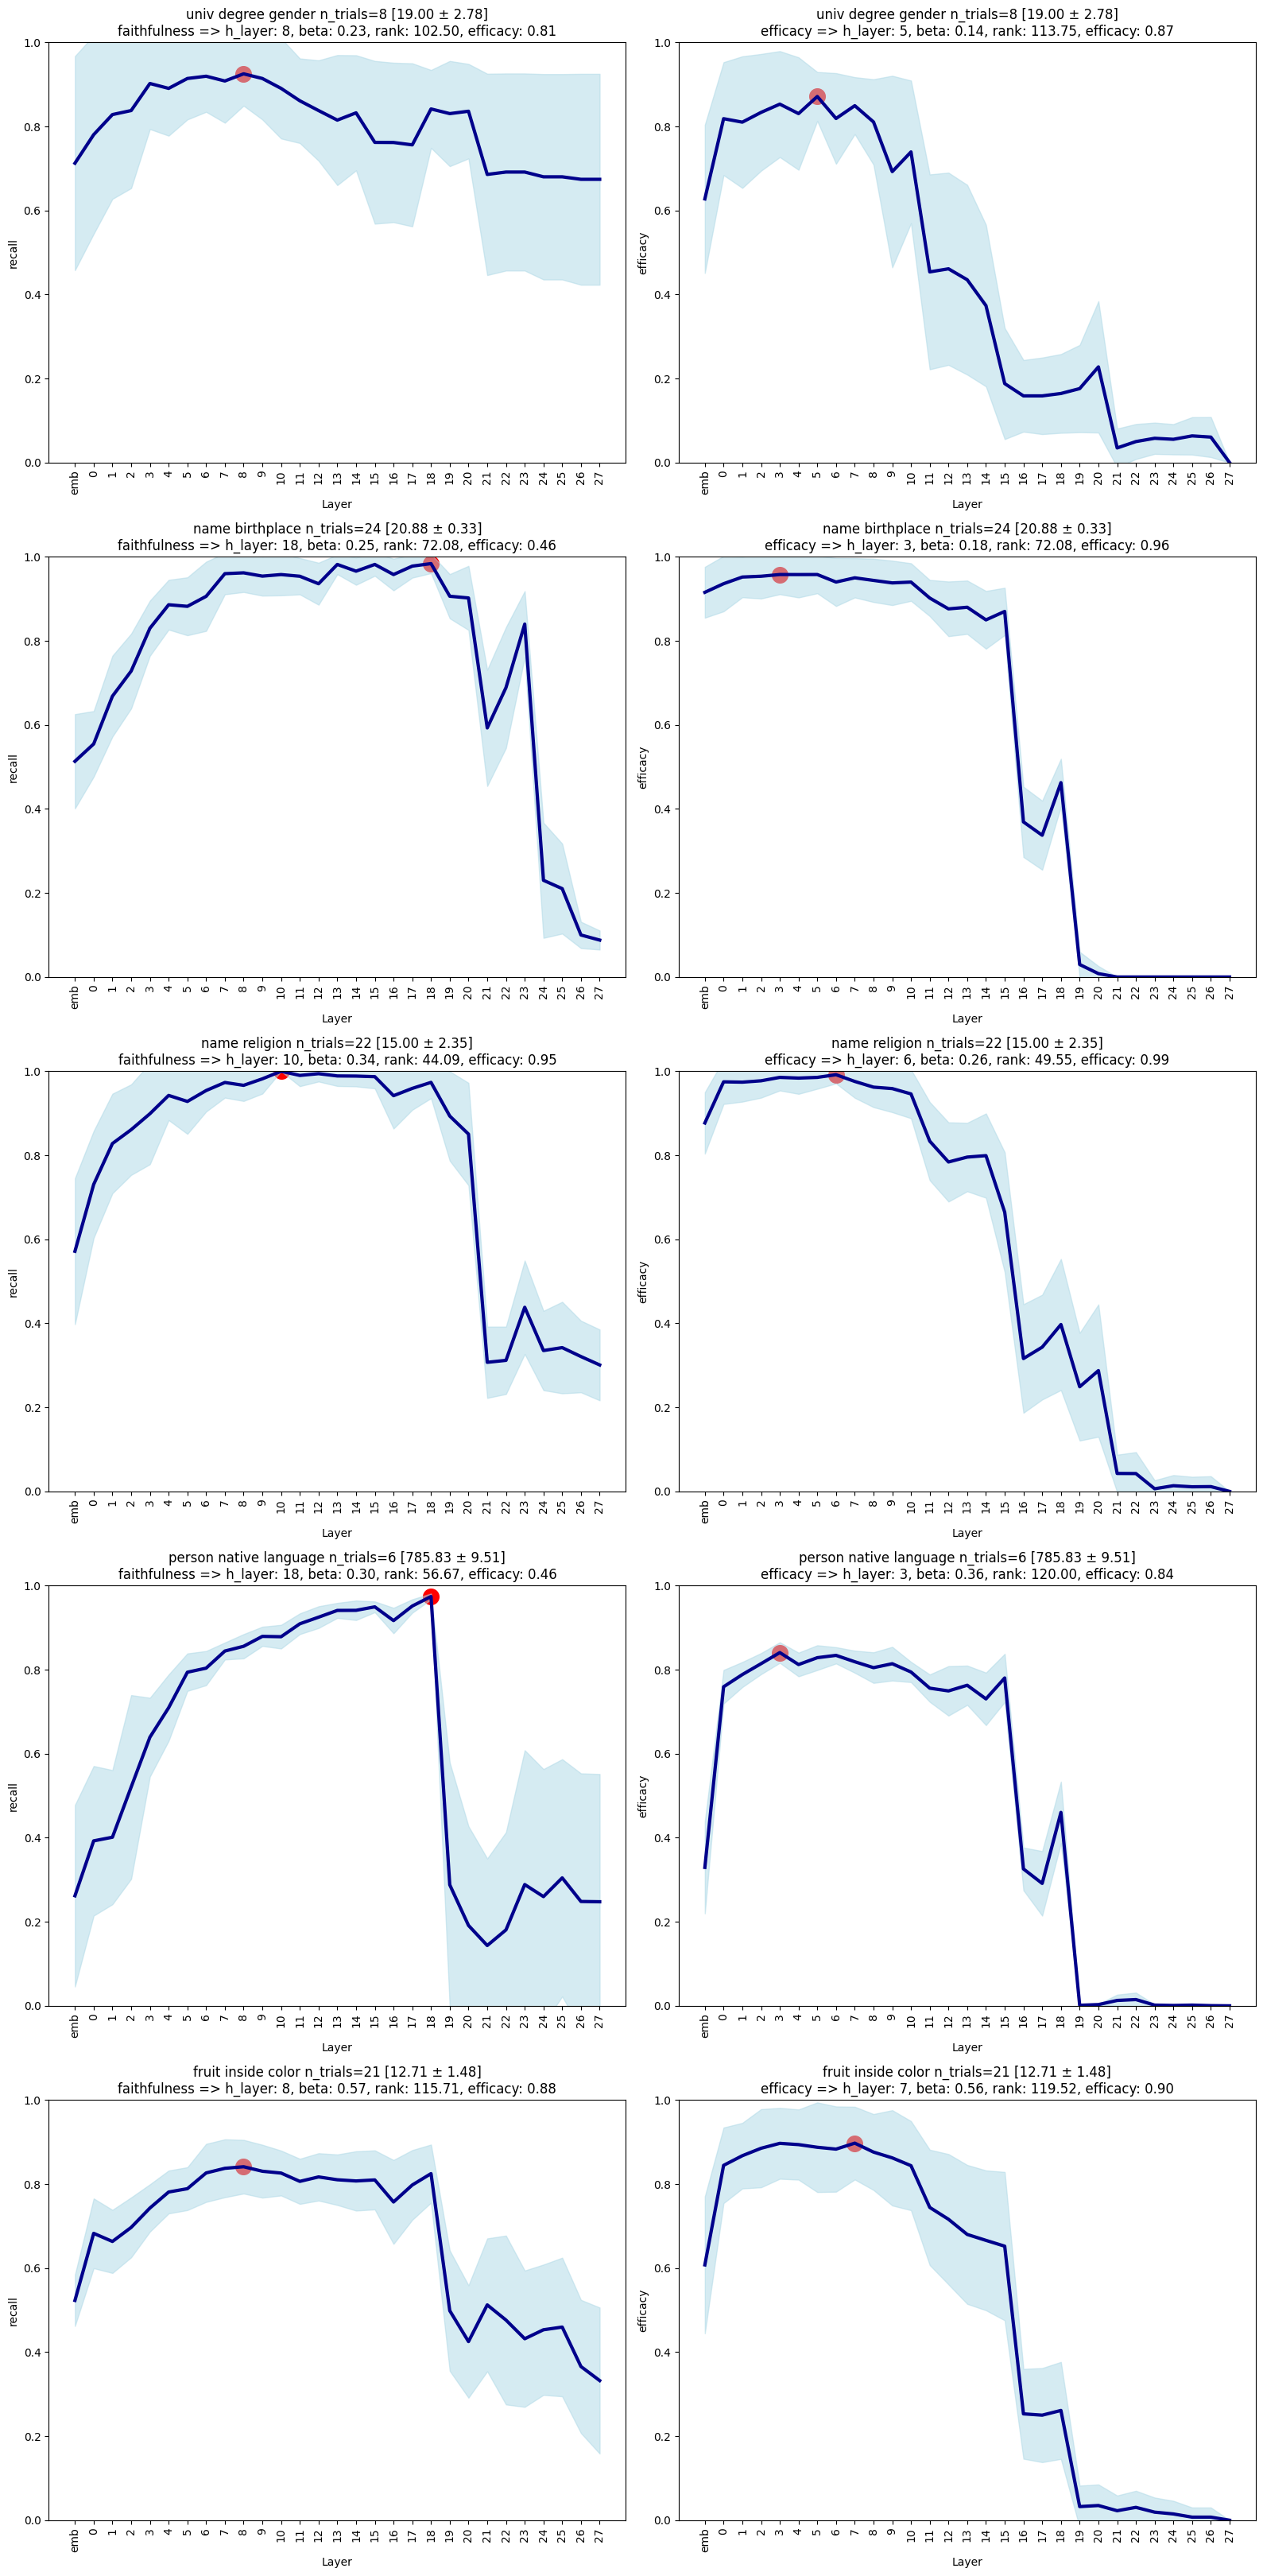

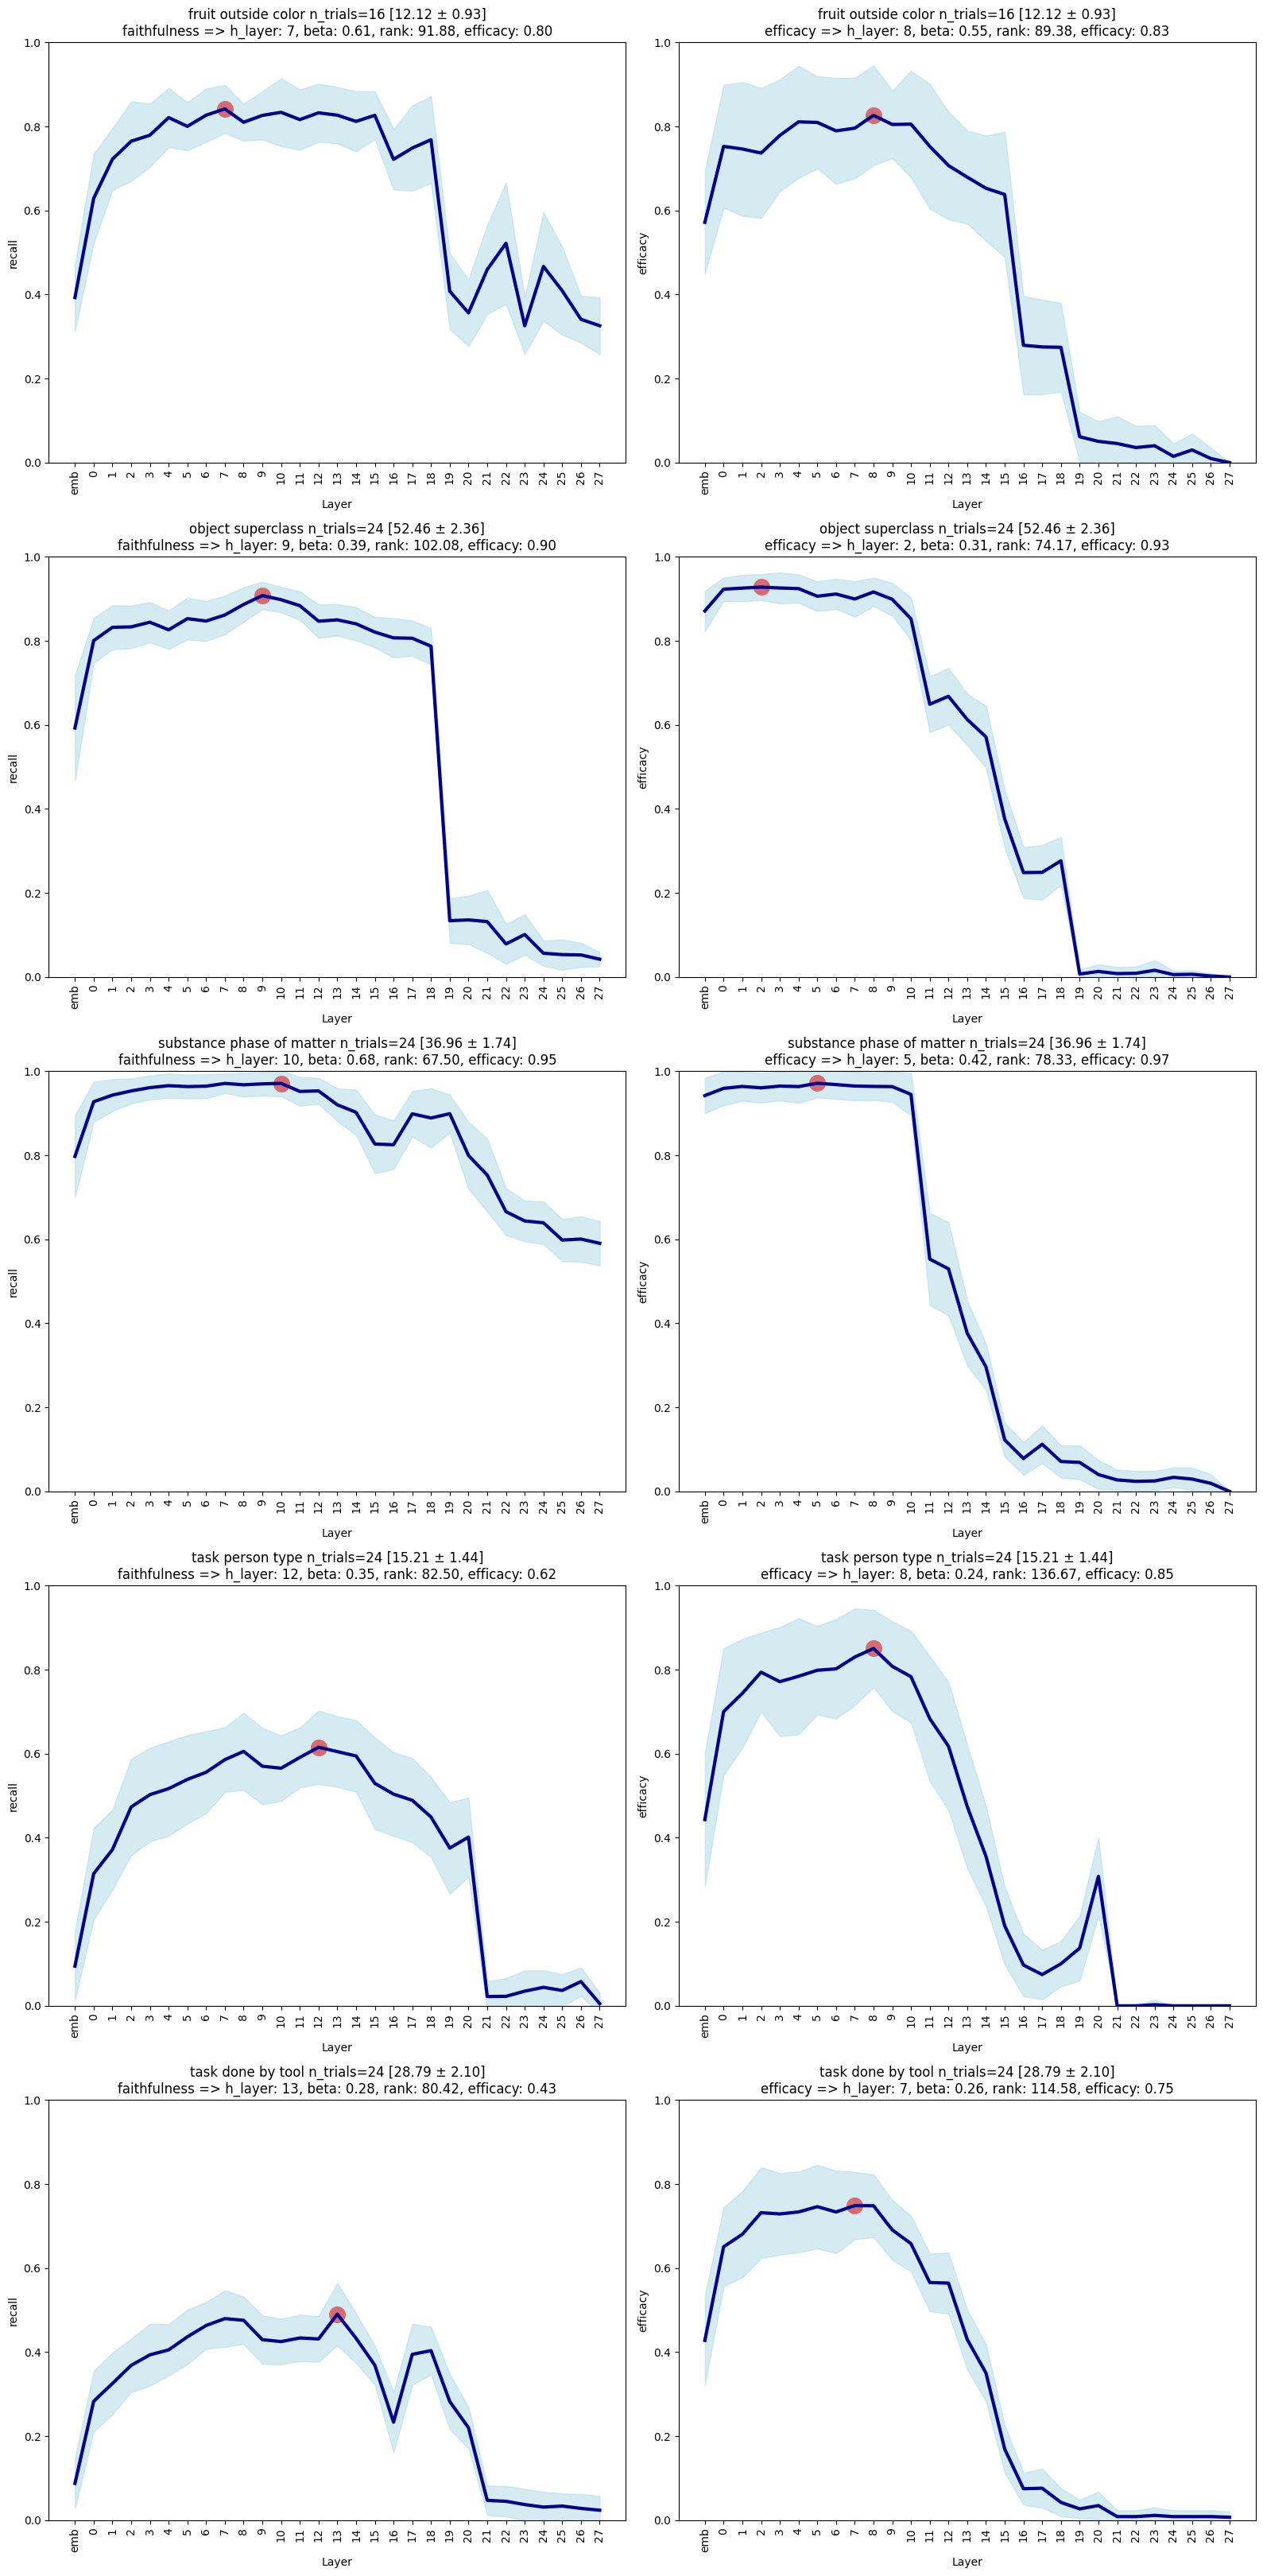

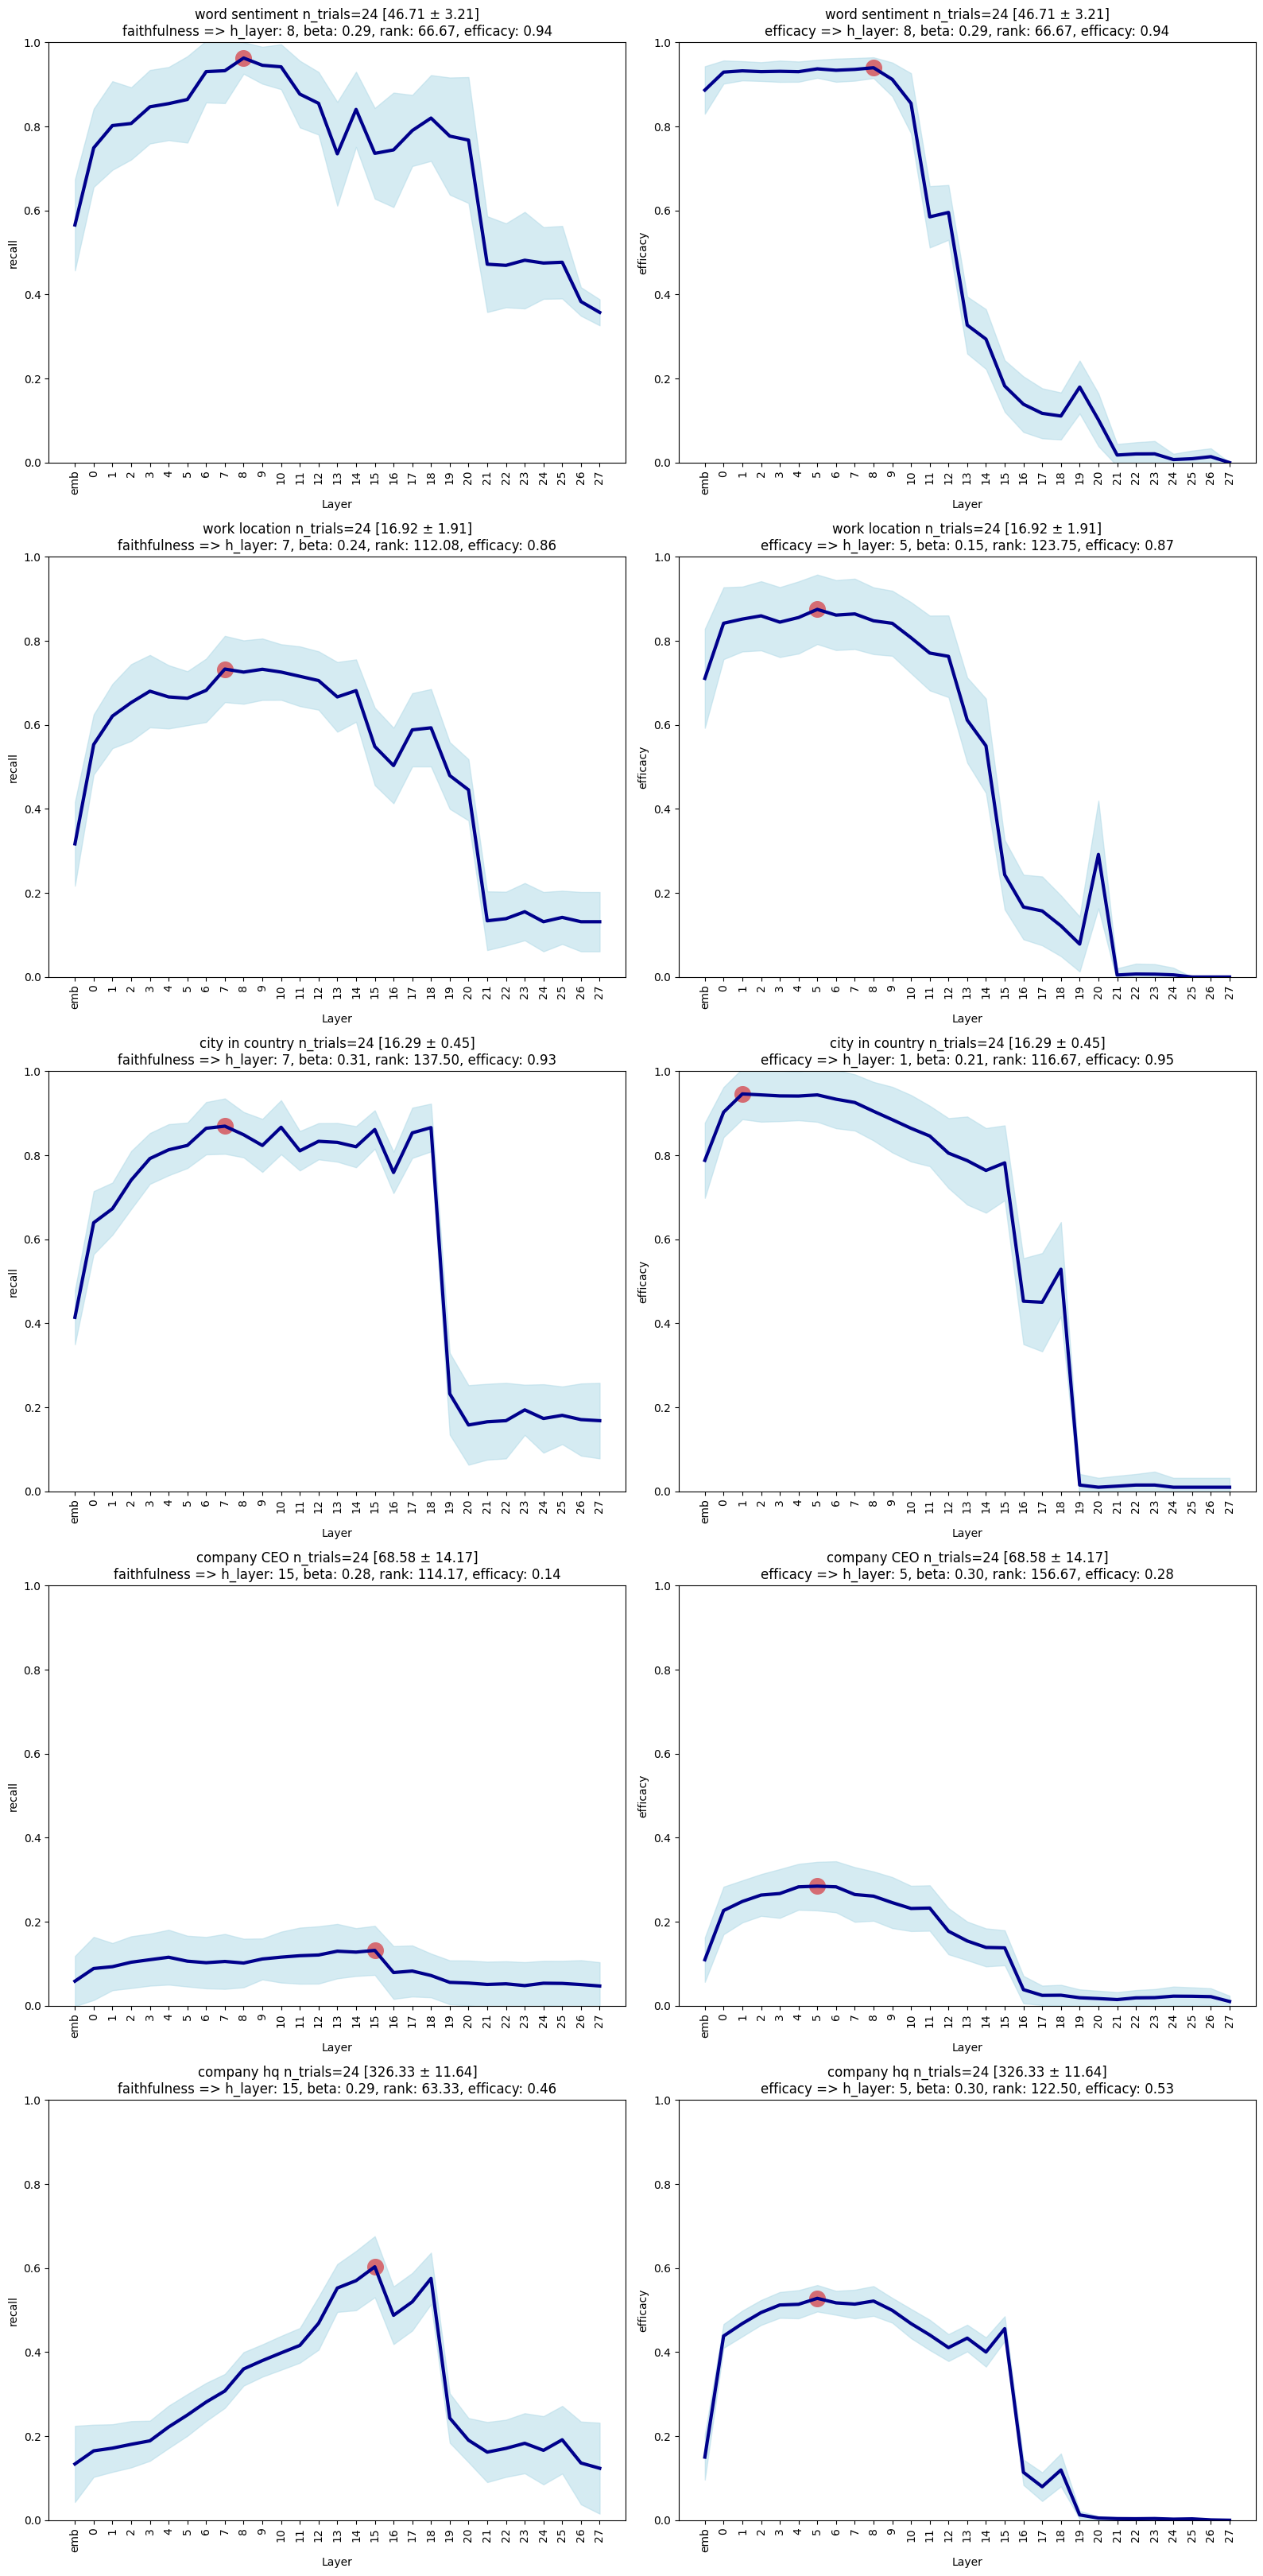

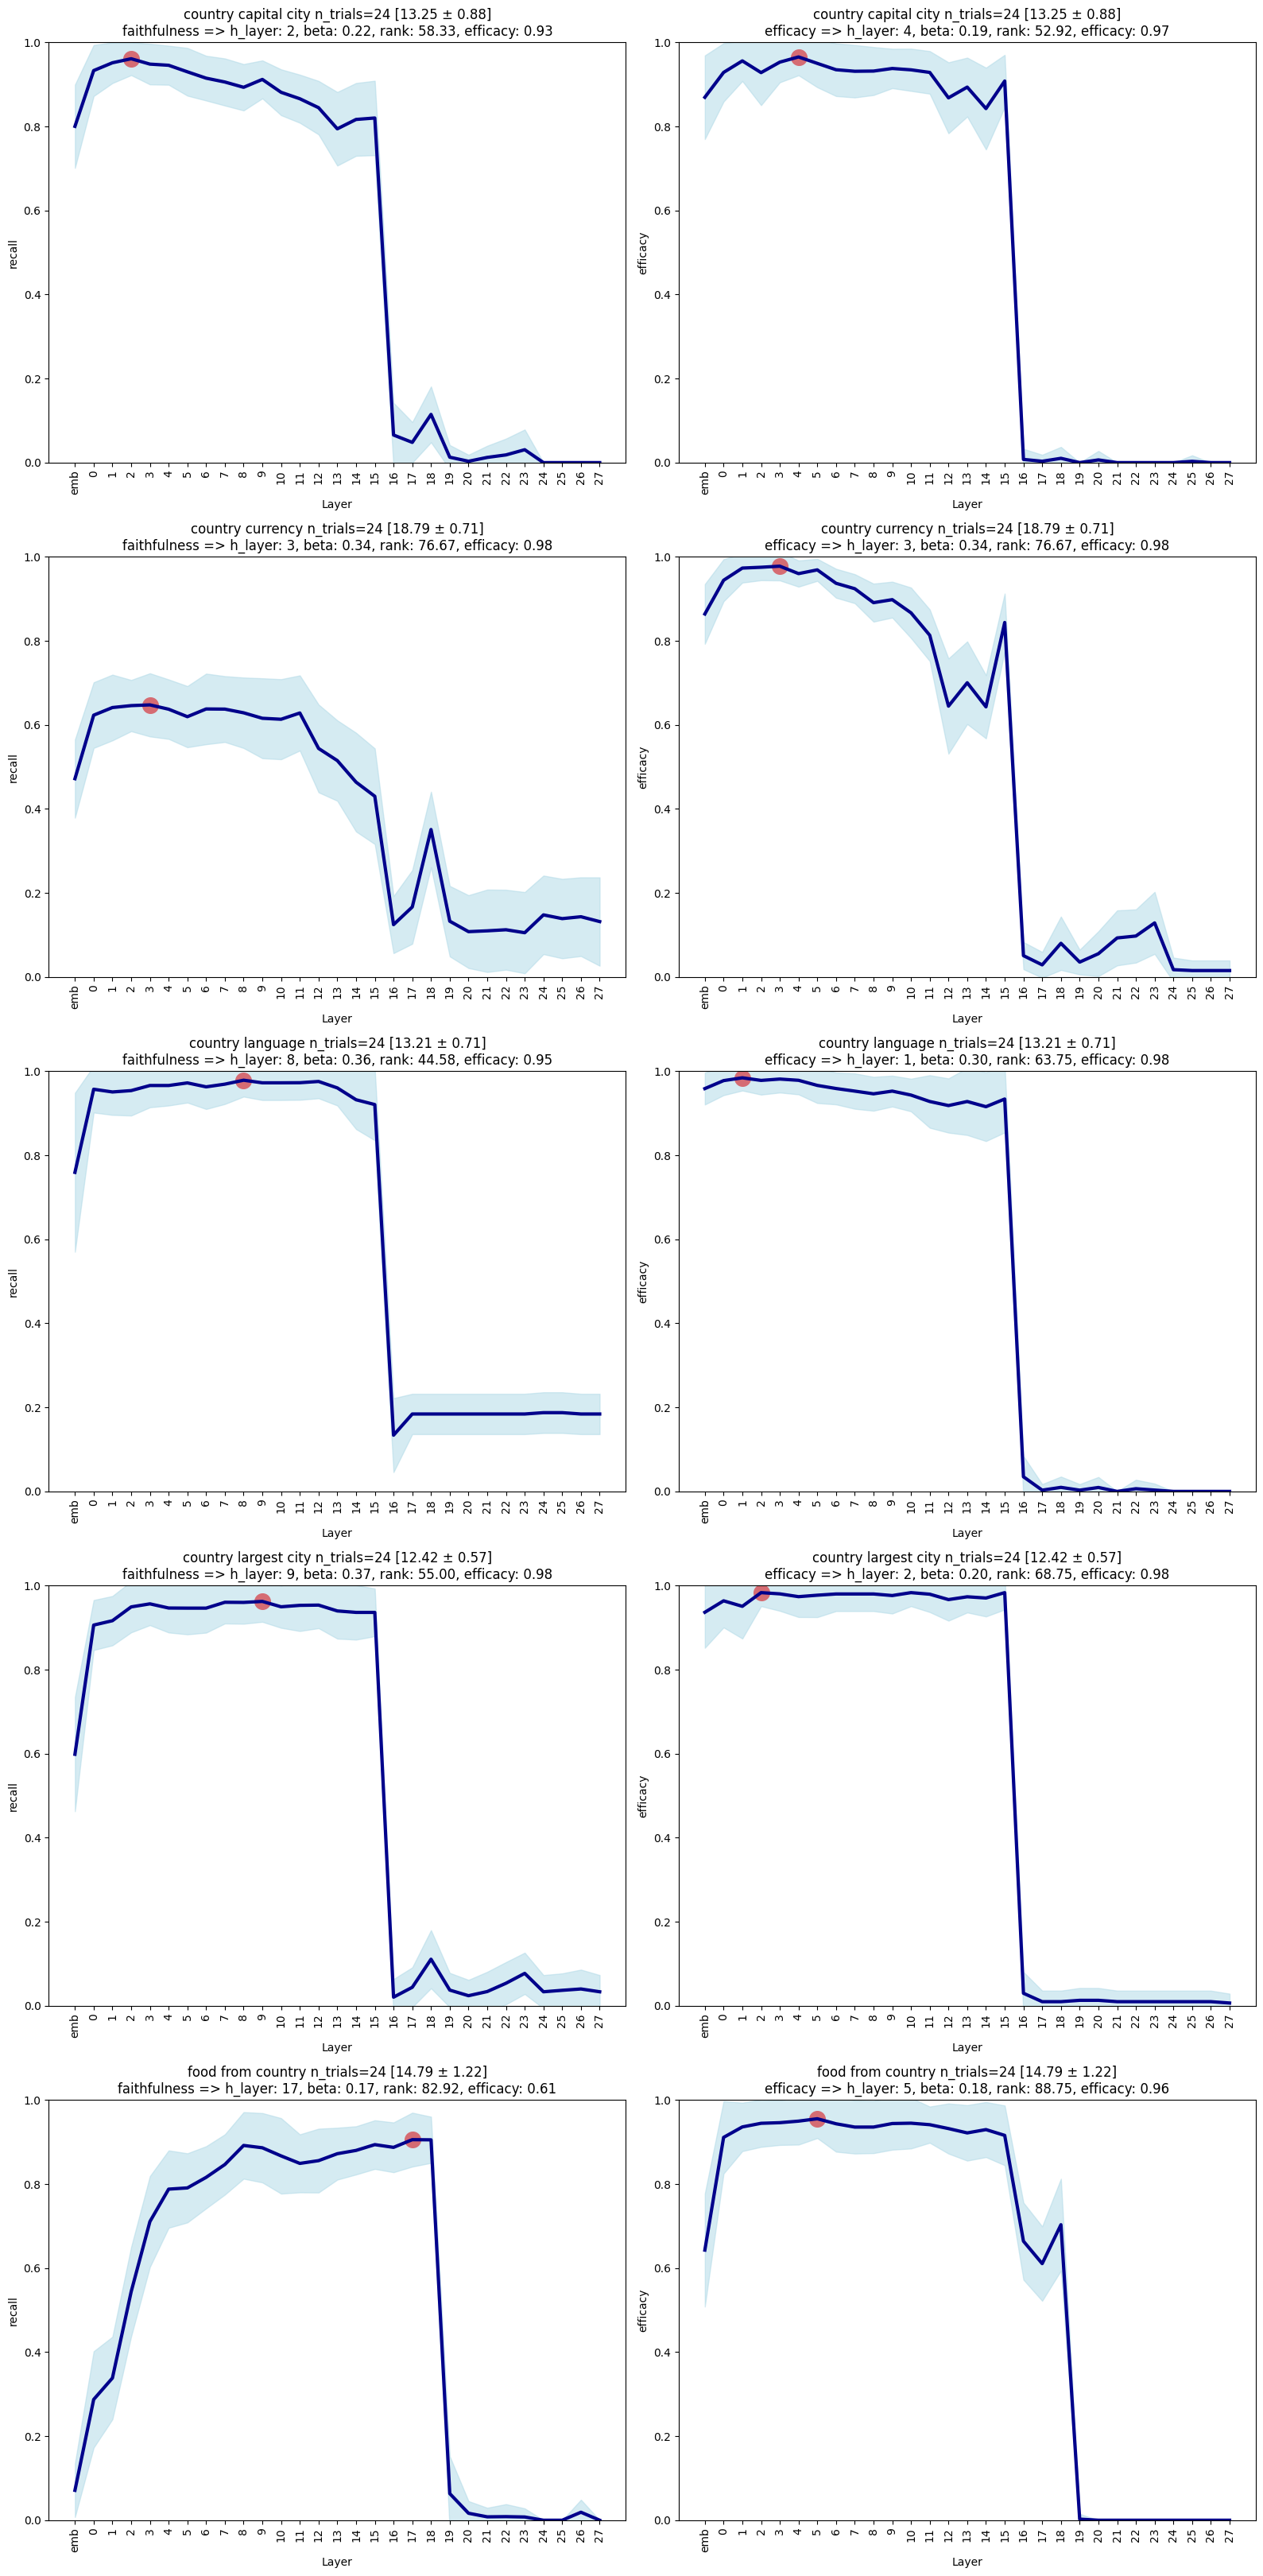

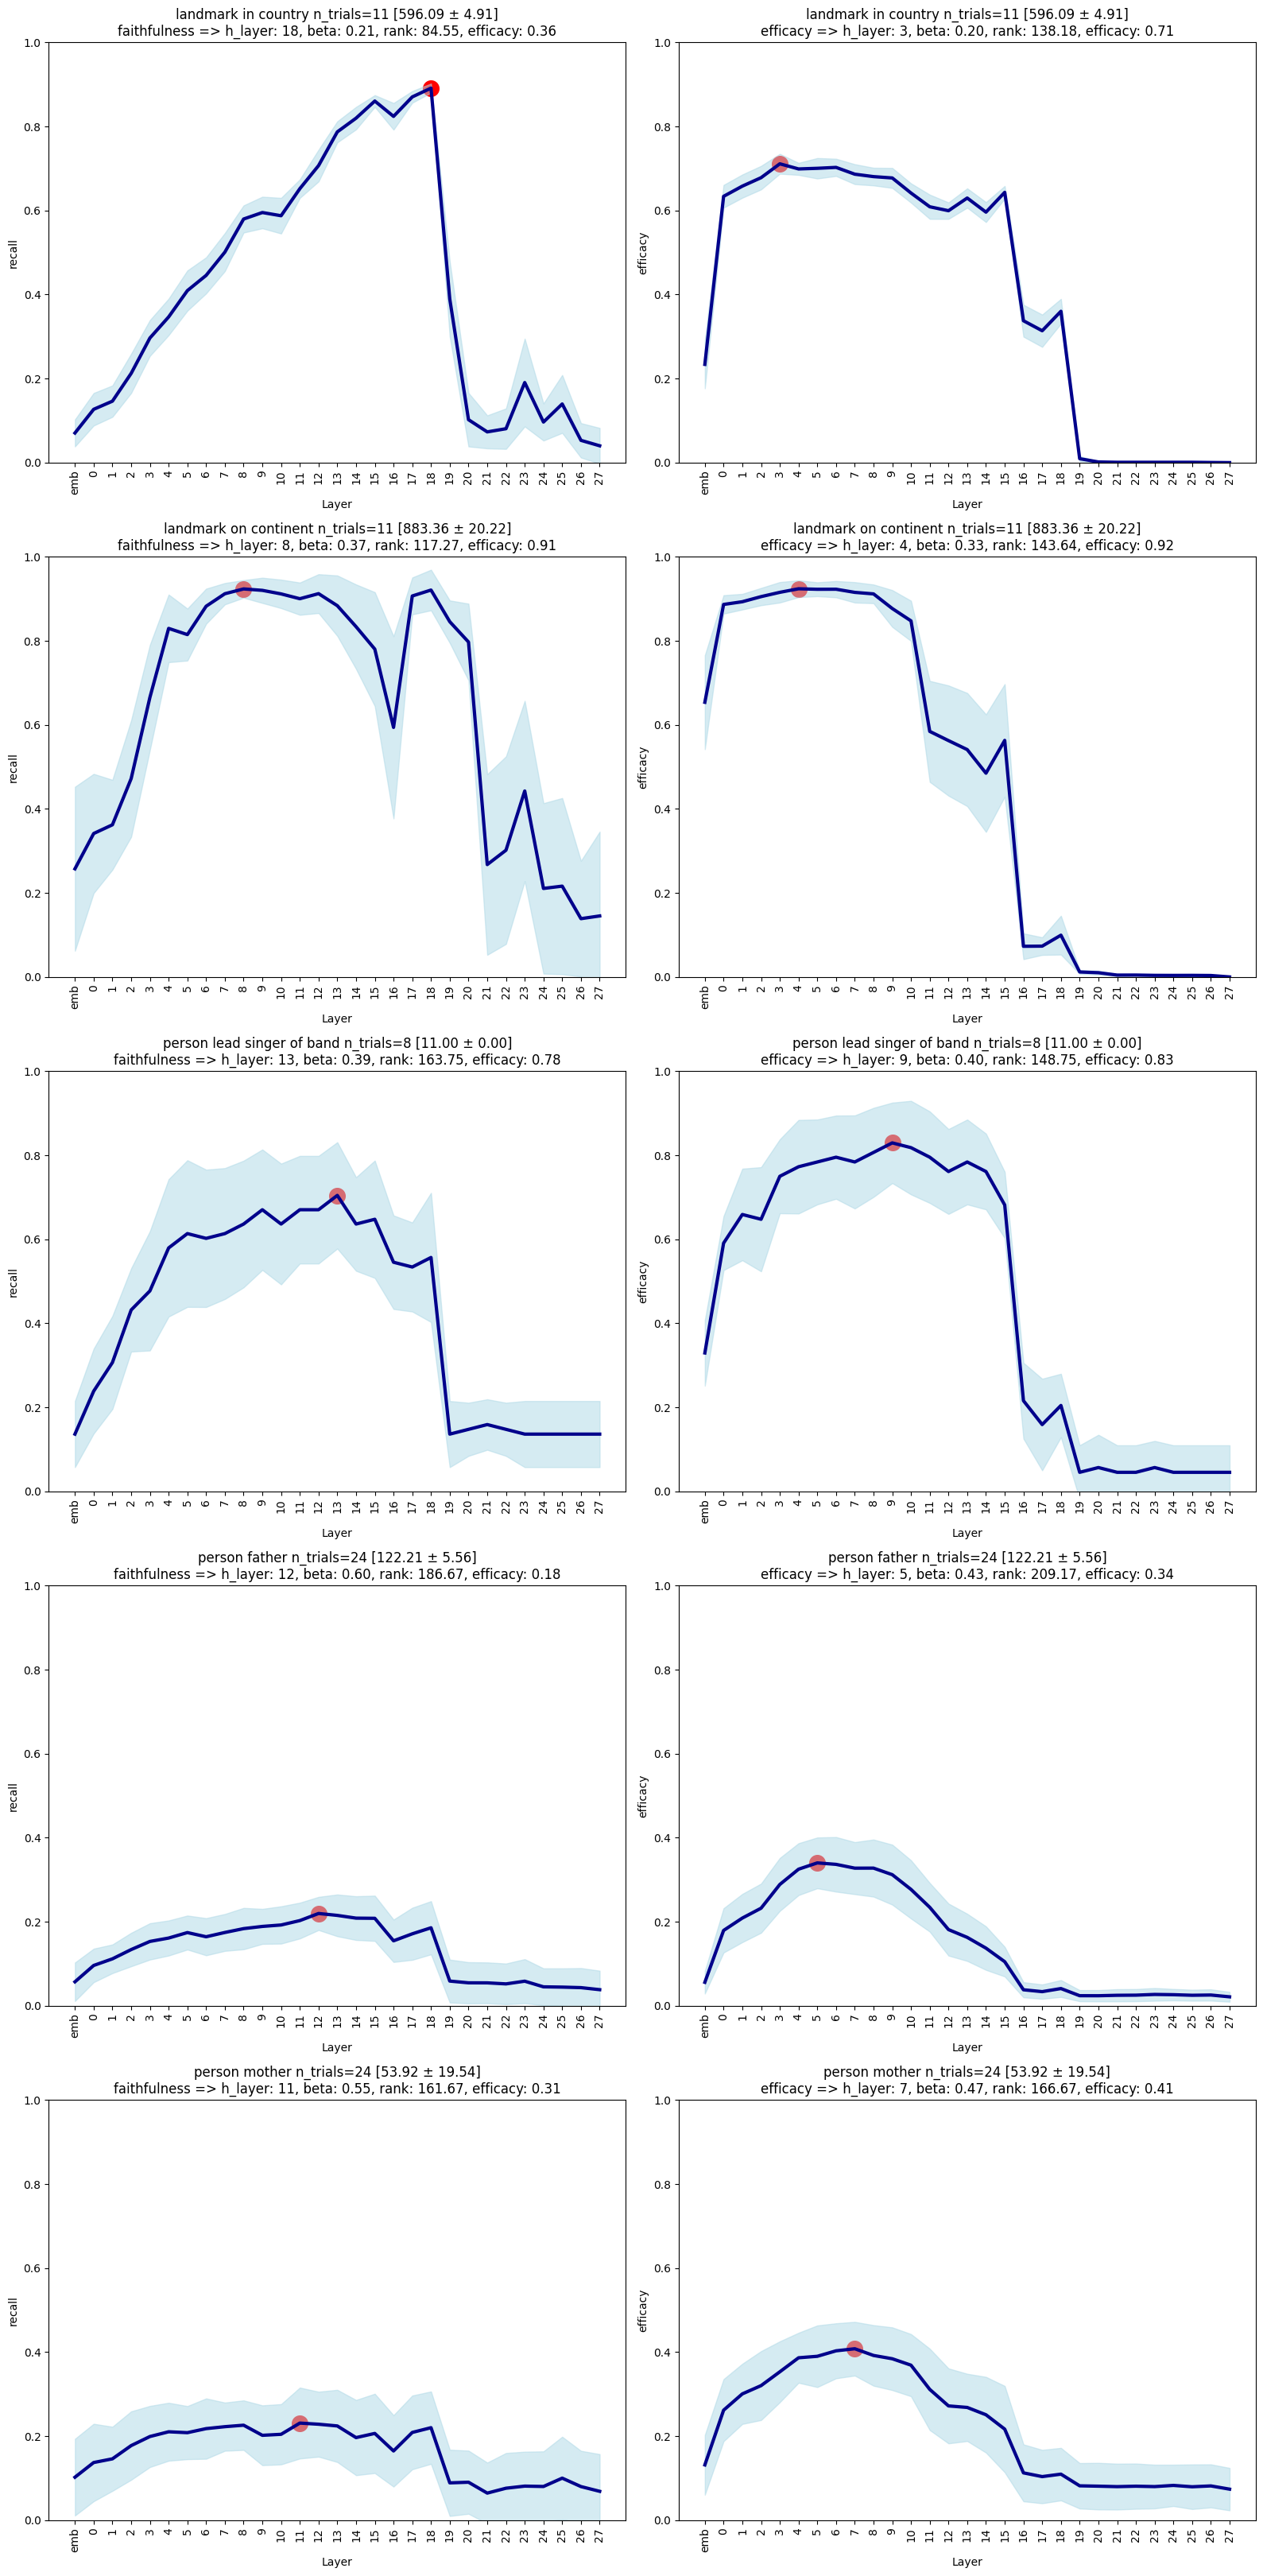

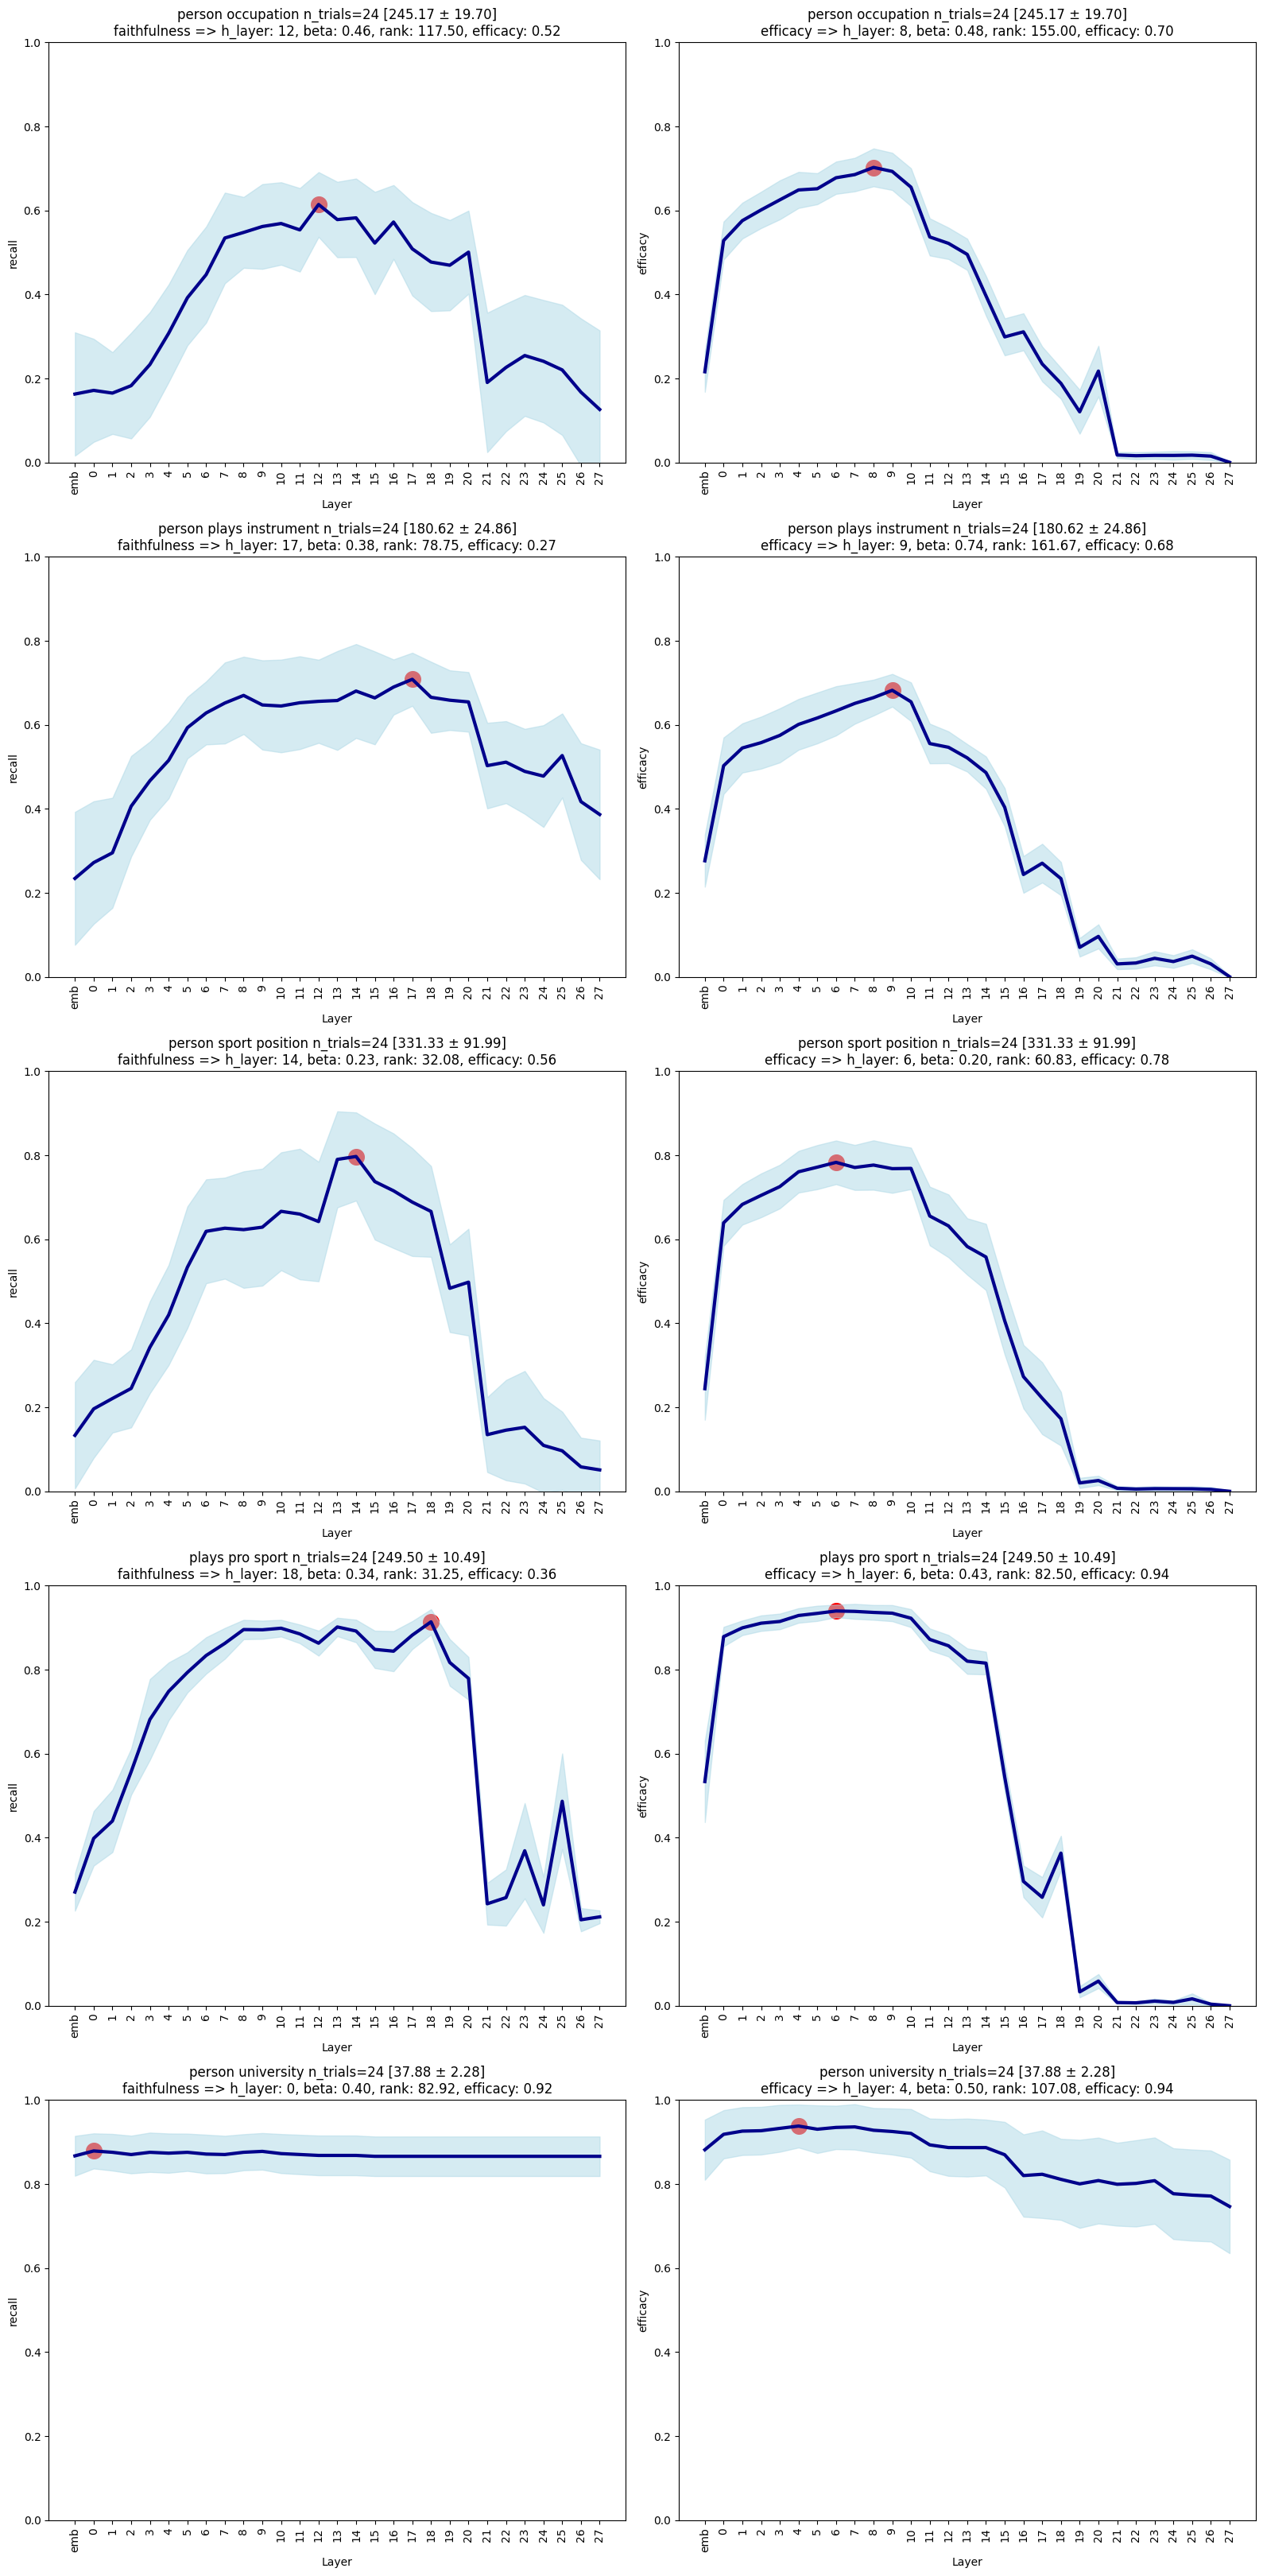

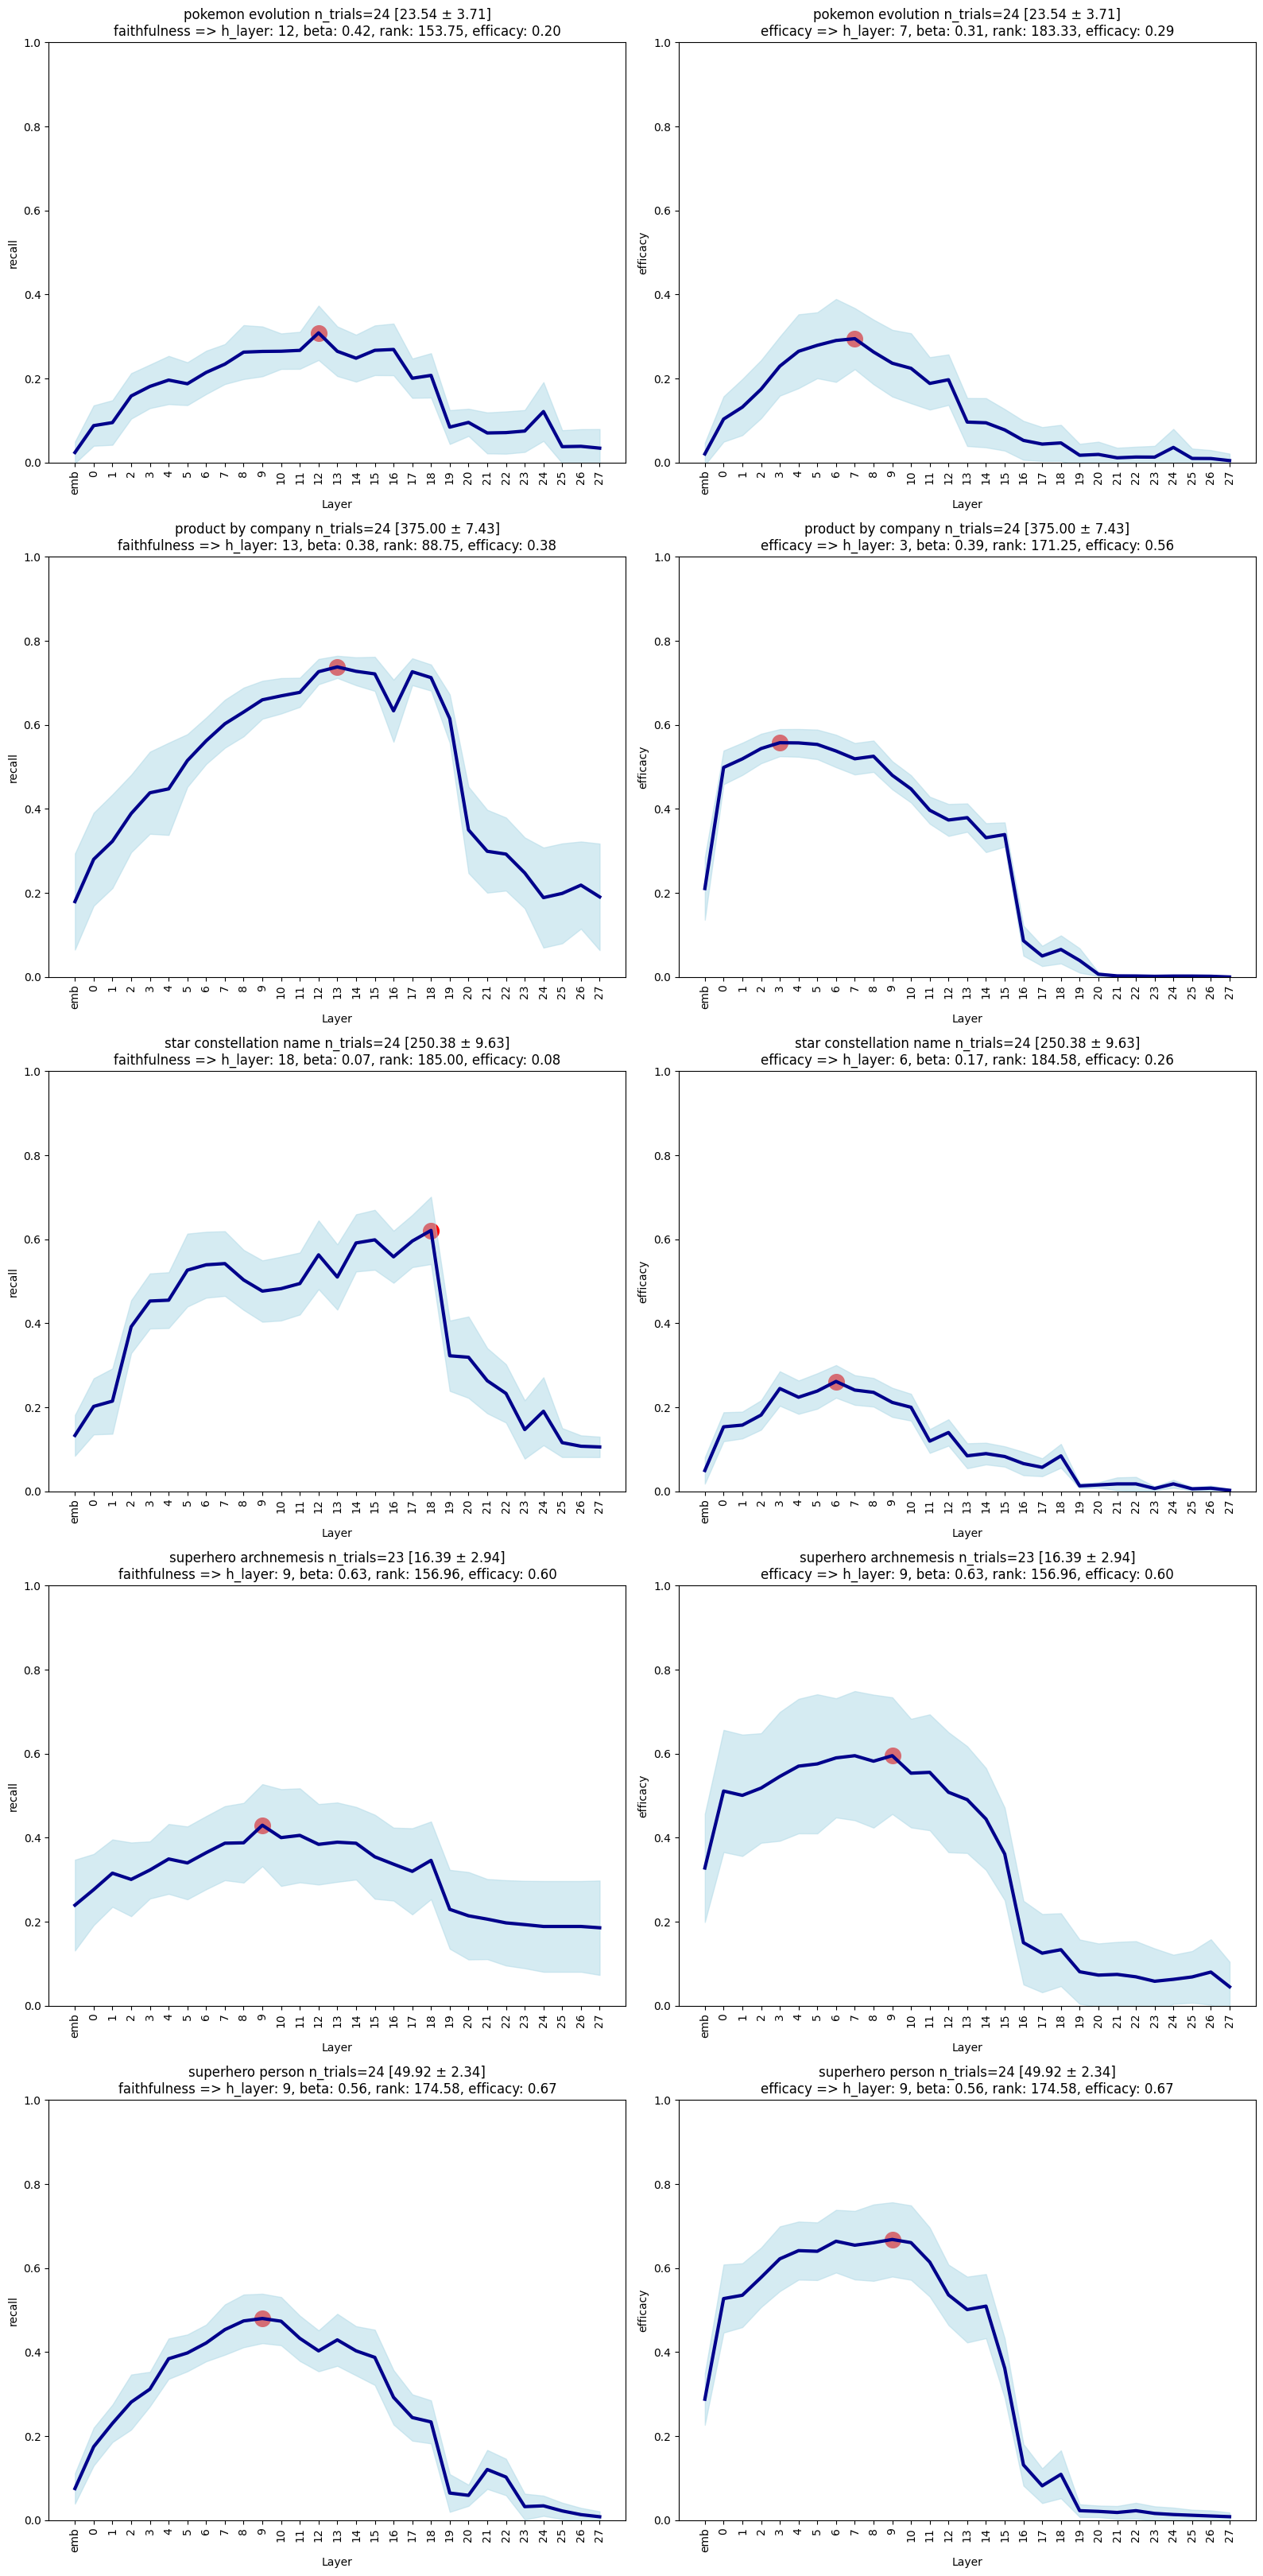

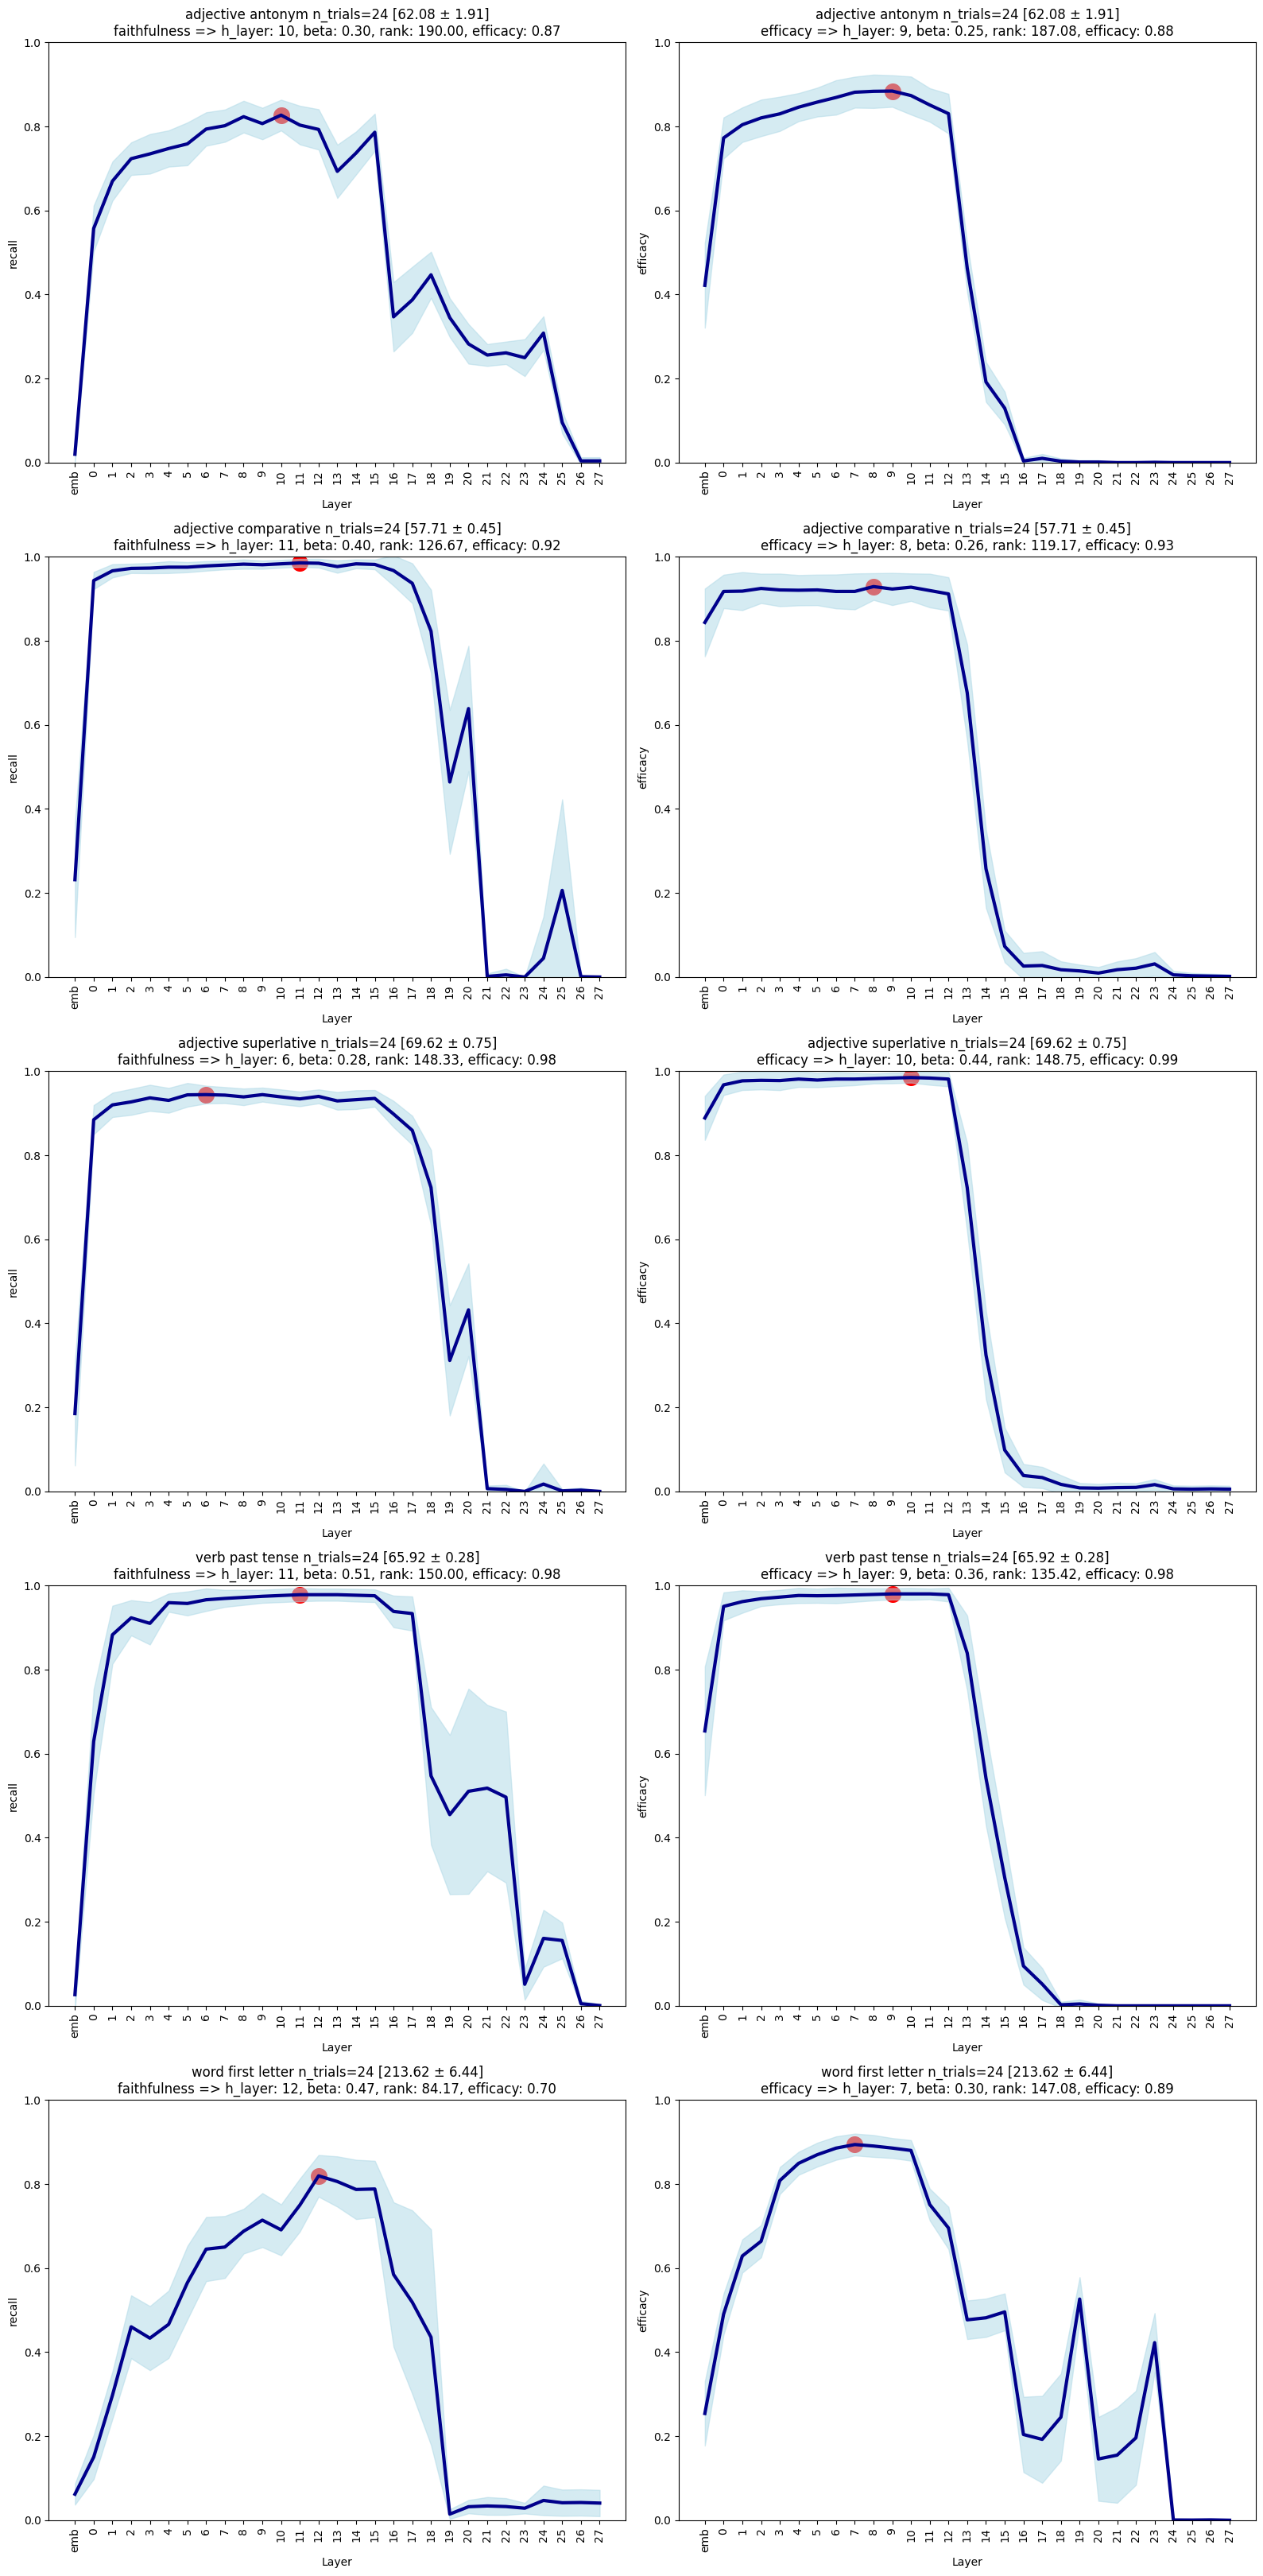

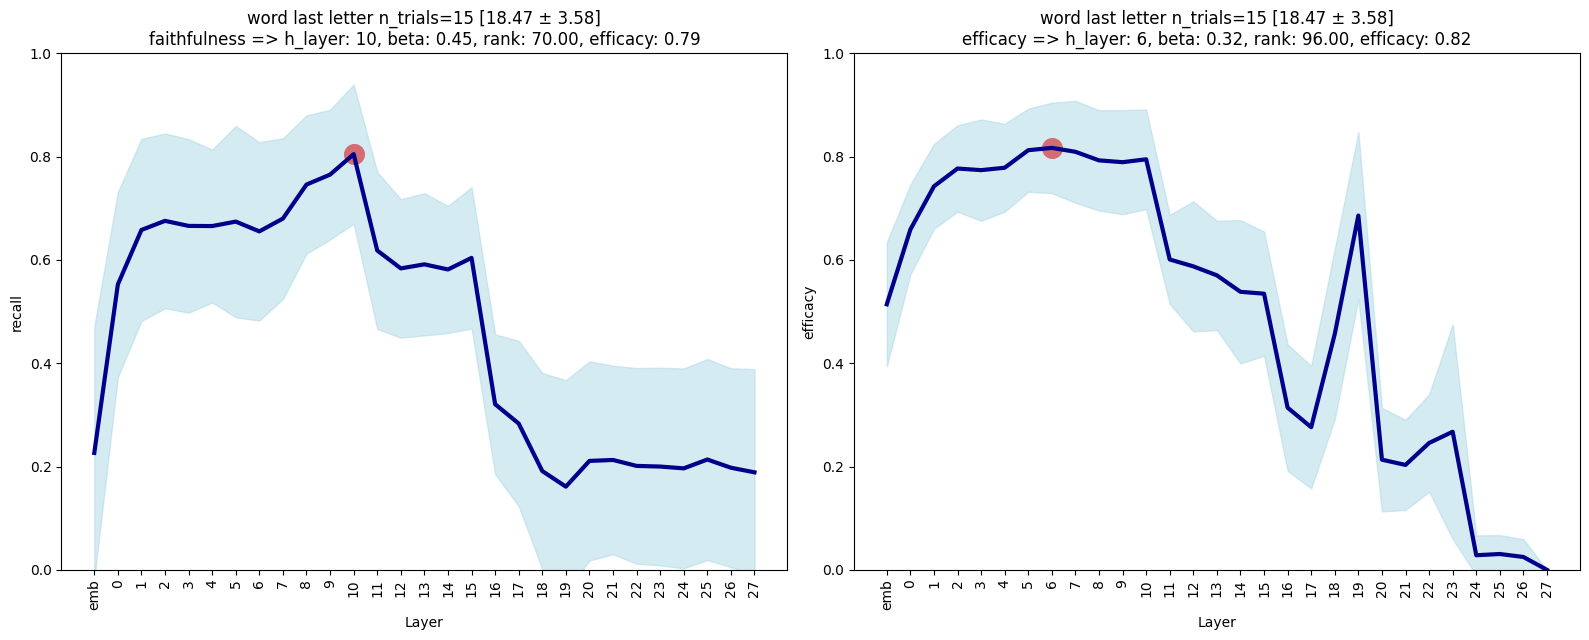

In [16]:
step_size = 5

for _from in range(0, len(filtered_results), step_size):
    _to = min(len(filtered_results), _from + step_size)
    n_subplots = len(filtered_results) * 3
    n_subplots = (_to - _from)  * 2
    ncols=2
    nrows=int(np.ceil(n_subplots/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 8, nrows * 6.5))
    if n_subplots == 1:
        axes = [axes]
    if nrows == 1:
        axes = [axes]

    ax_col, ax_row = 0, 0
    for i, (relation_name, relation_result) in list(enumerate(filtered_results.items()))[_from  : _to]:
        print(i, relation_name)
        # result = parse_results(sweep_results[relation_name])
        result = filtered_results[relation_name]
        plot_layerwise(axes[ax_row][0], result)
        plot_layerwise(axes[ax_row][1], result, attribute="efficacy", best_criterion="efficacy")
        # if(relation_name in efficacy_baseline_results):
        #     efficacy_baselines = parse_efficacy_baseline_results(efficacy_baseline_results[relation_name])
        #     plot_efficacy_baseline(axes[ax_row][1], efficacy_baselines)
        # plot_layerwise(axes[ax_row][2], result, attribute="jh_norm", best_criterion="efficacy")
        ax_row += 1
    fig.tight_layout()
    fig.show()

In [12]:
def get_recall_vs_efficacy_info(sweep_results, criterion = "best", threshold = 30):
    recalls = []
    efficacies = []
    pass_threshold = []
    labels = []
    for relation_name in sweep_results:
        if len(sweep_results[relation_name].trials) == 0:
            continue
        if criterion in ["best", "faithfulness"]:
            recalls.append(sweep_results[relation_name].best_by_faithfulness().recall.mean)
        else:
            recalls.append(sweep_results[relation_name].best_by_efficacy().recall.mean)
        if criterion in ["best", "efficacy"]:
            efficacies.append(sweep_results[relation_name].best_by_efficacy().efficacy.mean)
        else:
            efficacies.append(sweep_results[relation_name].best_by_faithfulness().efficacy.mean)
        
        test_samples = np.array([trial.n_test_samples for trial in sweep_results[relation_name].trials])
        pass_threshold.append(test_samples.min() >= threshold)
        labels.append(relation_name)

    return recalls, efficacies, pass_threshold, labels

/tmp/ipykernel_5910/2145924773.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


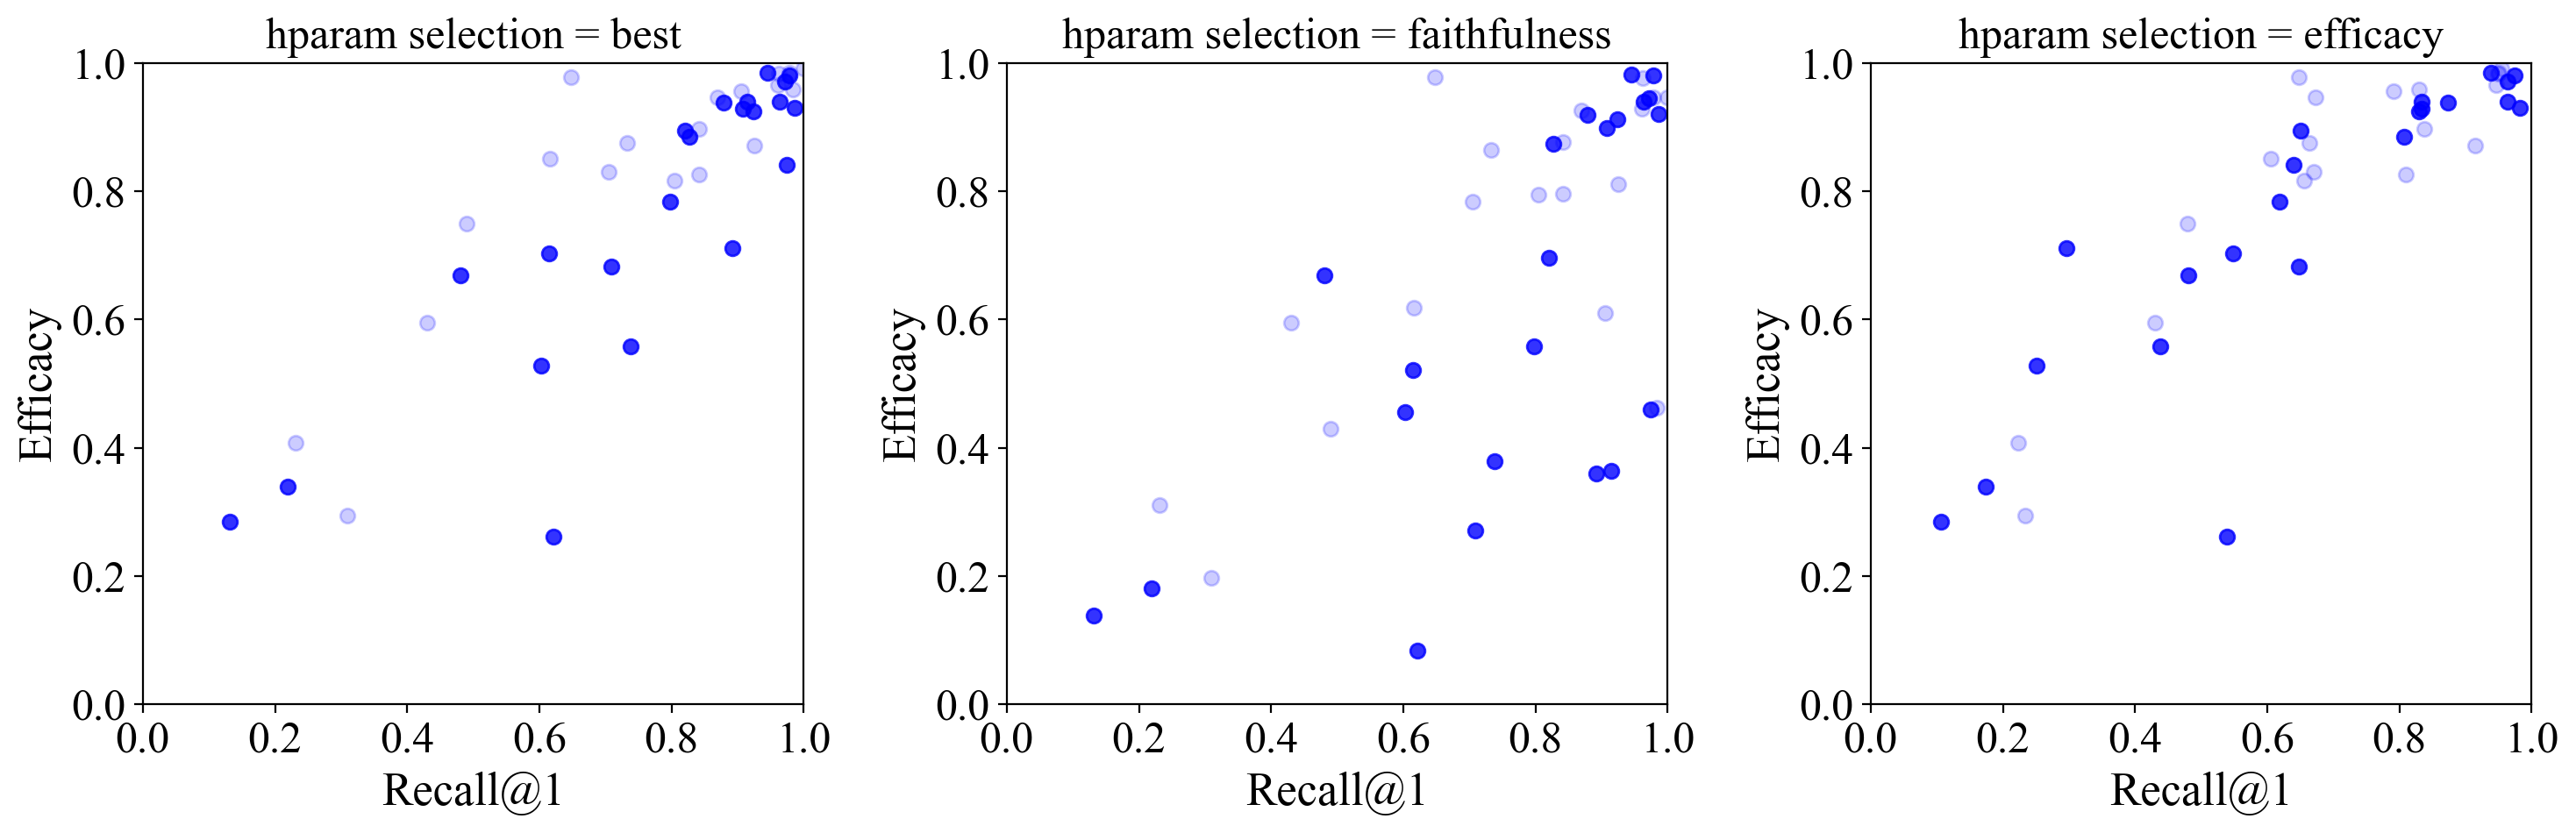

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for criterion, ax in zip(["best", "faithfulness", "efficacy"], axes):
    recalls, efficacies, pass_threshold, labels = get_recall_vs_efficacy_info(filtered_results, criterion=criterion)
    for recall, efficacy, threshold, relation_name in zip(recalls, efficacies, pass_threshold, labels):
        alpha = .8 if threshold else 0.2
        ax.scatter(recall, efficacy, color="blue", alpha=alpha)
        # if threshold and (recall/efficacy < .7 or efficacy/recall < .7):
        #     ax.annotate(relation_name, (recall, efficacy))


    ax.set_title(f"hparam selection = {criterion}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Recall@1")
    ax.set_ylabel("Efficacy")

fig.tight_layout()
fig.show()

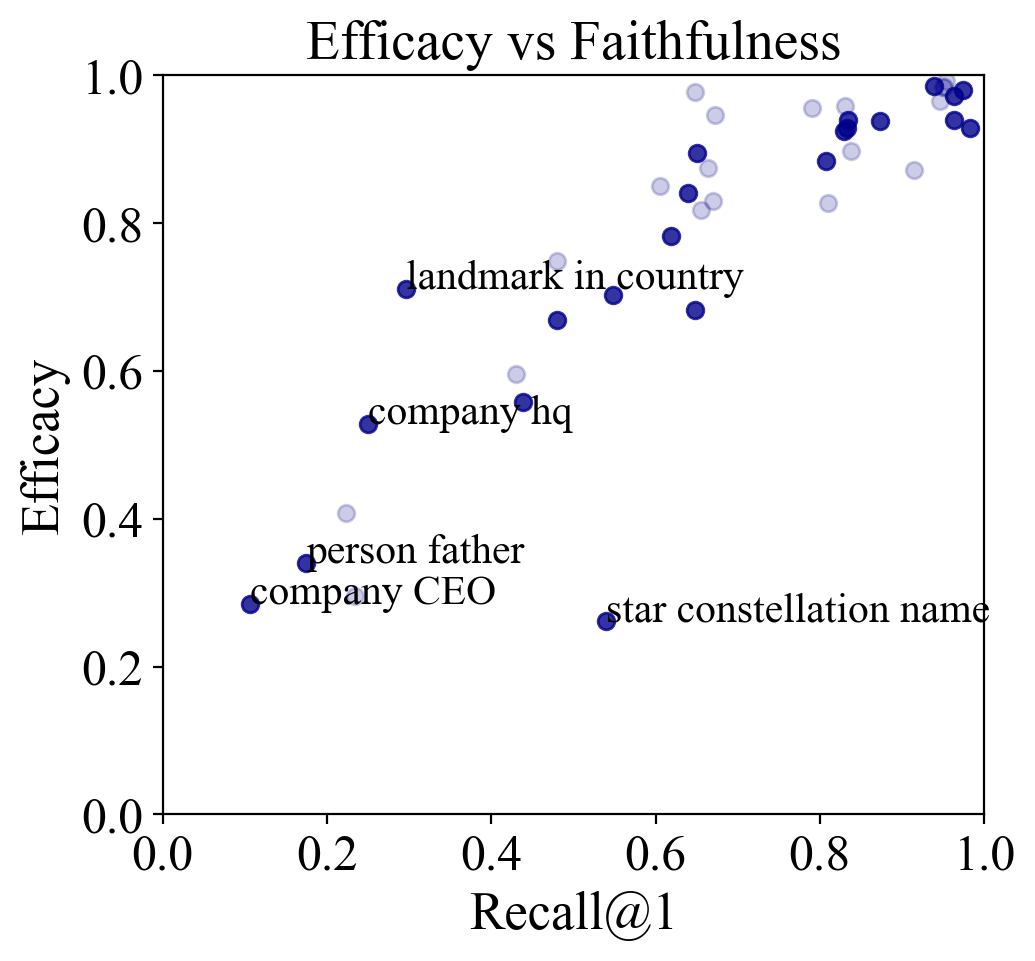

In [14]:
fig_dir = "figs"
#####################################################################################
plt.rcdefaults()
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", labelsize=MEDIUM_SIZE+1)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=50)  # fontsize of the figure title
#####################################################################################

# plt.rcdefaults()
recalls, efficacies, pass_threshold, labels = get_recall_vs_efficacy_info(filtered_results, criterion="efficacy")
for recall, efficacy, threshold, relation_name in zip(recalls, efficacies, pass_threshold, labels):
    alpha = .8 if threshold else 0.2
    plt.scatter(recall, efficacy, color="darkblue", alpha=alpha)
    if threshold and (recall/efficacy < .6 or efficacy/recall < .6):
        plt.annotate(relation_name, (recall, efficacy))


plt.title(f"Efficacy vs Faithfulness", fontsize=BIGGER_SIZE)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Recall@1")
plt.ylabel("Efficacy")
plt.gca().set_aspect('.9')

plt.savefig(f"{fig_dir}/efficacy_vs_faithfulness.pdf", bbox_inches="tight")

plt.show()

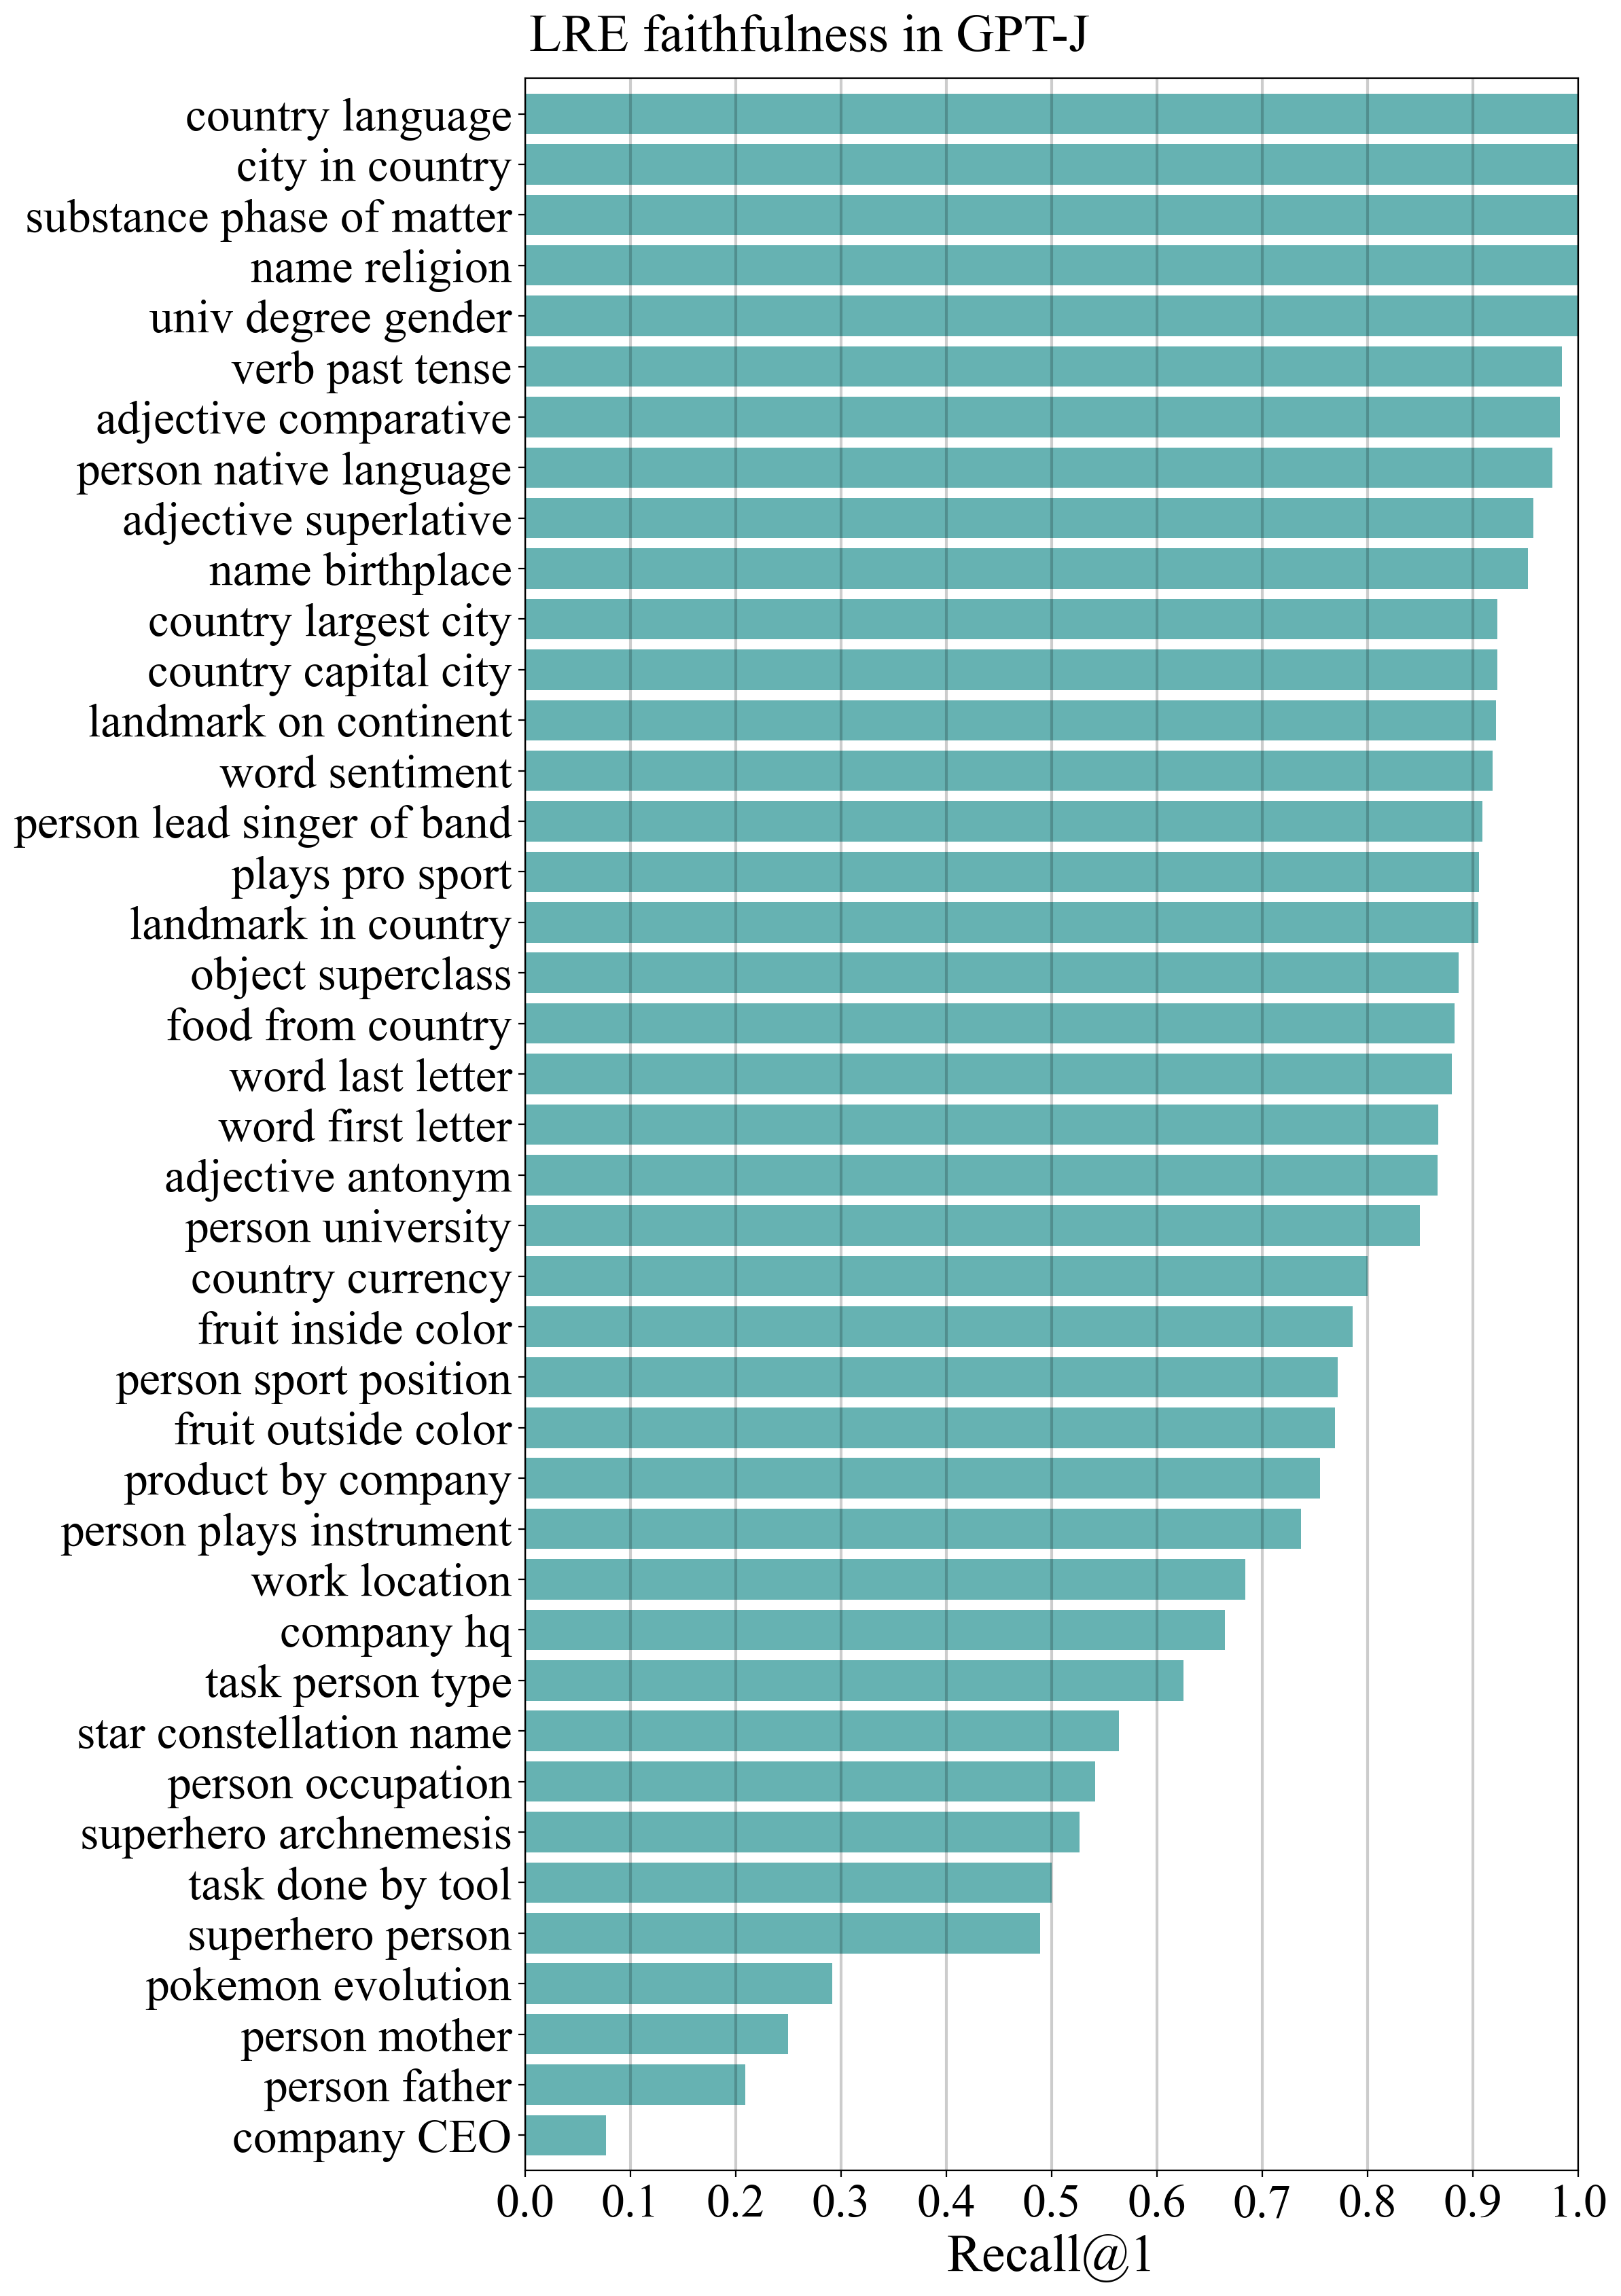

In [16]:
#####################################################################################
plt.rcdefaults()
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 15
MEDIUM_SIZE = 25
BIGGER_SIZE = 28

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

relation_and_recall = []

for relation_name in filtered_results:
    relation_and_recall.append({
        "relation": relation_name,
        "recall@1": filtered_results[relation_name].best_by_faithfulness().recall.values[0]
    })

relation_and_recall = sorted(relation_and_recall, key = lambda x: x["recall@1"])

relations = [r["relation"] for r in relation_and_recall]
recalls = [r["recall@1"] for r in relation_and_recall]

plt.figure(figsize = (10, 20))
plt.barh(np.arange(len(relations)), recalls, color = "teal", alpha = 0.6)
plt.yticks(np.arange(len(relations)), relations)
plt.xticks(np.linspace(0, 1, 11), [np.round(v, 1) for v in np.linspace(0, 1, 11)])
plt.ylim(-0.7,len(relation_and_recall)-.3)
plt.xlabel("Recall@1")
plt.xlim(0, 1)

for x_tick in np.linspace(0, 1, 11):
    plt.axvline(x_tick, color = "black", alpha = 0.2)

plt.title("LRE faithfulness in GPT-J", x = 0.27, pad=15, fontsize=BIGGER_SIZE)
plt.savefig(f"{fig_dir}/faithfulness_lre_relationwise.pdf", bbox_inches="tight")
plt.show()

In [ ]:
#

### Single vs Multi token subjects

In [ ]:
def read_and_parse_sweep_results(sweep_path):
    sweep_results = read_sweep_results(sweep_path)
    for relation in sweep_results:
        sweep_results[relation] = parse_results(sweep_results[relation])
    return sweep_results

In [ ]:
sweep_single_path = f"../../results/sweep-single/{model_name}"
sweep_single = read_and_parse_sweep_results(sweep_single_path)

sweep_multi_path = f"../../results/sweep-multi/{model_name}"
sweep_multi = read_and_parse_sweep_results(sweep_multi_path)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4.5))

for criterion, ax in zip(["best", "faithfulness", "efficacy"], axes):
    single_recalls, single_efficacies, pass_single, single_labels = get_recall_vs_efficacy_info(sweep_single, criterion=criterion)
    multi_recalls, multi_efficacies, pass_multi, multi_labels = get_recall_vs_efficacy_info(sweep_multi, criterion=criterion)
    labeled = False
    for r, e, p, l in zip(single_recalls, single_efficacies, pass_single, single_labels):
        alpha = .8 if p else 0.2
        if (alpha == 0.8 and not labeled):
            ax.scatter(r, e, color = "blue", label = "single", alpha = alpha)
            labeled = True
        else:
            ax.scatter(r, e, color = "blue", alpha = alpha)
        if p and (r/e < .7 or e/r < .7):
            ax.annotate(l, (r, e))

    labeled = False
    for r, e, p, l in zip(multi_recalls, multi_efficacies, pass_multi, multi_labels):
        alpha = .8 if p else 0.2
        alpha = .8 if p else 0.2
        if (alpha == 0.8 and not labeled):
            ax.scatter(r, e, color = "red", label = "multi", marker = "s", alpha = alpha)
            labeled = True
        else:
            ax.scatter(r, e, color = "red", marker = "s", alpha = alpha)
        if p and (r/e < .7 or e/r < .7):
            ax.annotate(l, (r, e))

    ax.set_title(f"Efficacy vs Recall ({criterion})")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Recall")
    ax.set_ylabel("Efficacy")
    ax.legend()

In [ ]:
from src import models

In [ ]:
mt = models.load_model(name = "gptj", fp16=True, device="cuda")

In [ ]:
mt.tokenizer(" :")